<a href="https://colab.research.google.com/github/ThiagoVenturim/banco-vs-fintech/blob/src/src/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  Importação das Bibliotecas

Para a análise e visualização dos dados, foram utilizadas as seguintes bibliotecas do ecossistema Python, amplamente adotadas na ciência de dados:

* **`pandas`**: essencial para manipulação e análise de dados tabulares, permitindo operações como leitura de arquivos `.csv`, tratamento de dados nulos e criação de filtros personalizados.
* **`numpy`**: utilizada para operações matemáticas e manipulação de arrays, com foco em desempenho computacional.
* **`matplotlib.pyplot`** (importado como `plt`): biblioteca de visualização base que possibilita a criação de gráficos estáticos, como histogramas, linhas e barras.
* **`seaborn`**: biblioteca baseada no `matplotlib`, voltada para visualizações estatísticas mais elaboradas, com gráficos otimizados e de fácil interpretação.
* **`os`**: permite interações com o sistema operacional, como navegação entre diretórios e verificação de arquivos, facilitando o gerenciamento dos dados localmente.

In [240]:

# Manipulção de Dados
import pandas as pd
import numpy as np

#Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns


# Importando Base de Dados

Nesta etapa, foram importadas as três bases de dados do projeto State of Data Brazil, referentes aos anos de 2022, 2023 e 2024. Para permitir rastreabilidade temporal e facilitar análises comparativas, foi adicionada a coluna ano_base em cada DataFrame, indicando o respectivo ano da pesquisa.

Além disso, foi realizada uma verificação inicial do tamanho de cada conjunto de dados, com o objetivo de inspecionar a quantidade de linhas (respostas) e colunas (variáveis) disponíveis em cada ano.


In [241]:
# Carregando os CSVs
df_2022 = pd.read_csv('/content/state_of_data_2022.csv')
df_2023 = pd.read_csv('/content/state_of_data_2023.csv')
df_2024 = pd.read_csv('/content/state_of_data_2024.csv')

# Adicionando coluna de ano para identificar depois
df_2022["ano_base"] = 2022
df_2023["ano_base"] = 2023
df_2024["ano_base"] = 2024

# Verificando quantas linhas cada base tem
print(f"2022: {df_2022.shape}")
print(f"2023: {df_2023.shape}")
print(f"2024: {df_2024.shape}")

2022: (4271, 354)
2023: (5293, 400)
2024: (5217, 404)


# Padronização dos nomes das colunas
Durante o processo de preparação dos dados, foi realizada uma padronização completa dos nomes das colunas das bases de dados referentes aos anos de 2022, 2023 e 2024 da pesquisa State of Data Brazil. Essa padronização teve como objetivo:

* Unificar a nomenclatura das variáveis entre diferentes edições da pesquisa.

* Facilitar a concatenação dos datasets e a análise temporal dos dados.

* Garantir consistência semântica, mesmo quando as perguntas ou estruturas mudaram levemente entre os anos.

In [242]:
colunas_2022_simplificadas = [
    'id', 'idade', 'faixa_idade', 'genero', 'cor_raca_etnia', 'pcd',
    'experiencia_profissional_prejudicada', 'aspectos_prejudicados', 'vive_no_brasil',
    'estado_onde_mora', 'uf_onde_mora', 'regiao_onde_mora', 'mudou_de_estado_de_origem',
    'regiao_de_origem', 'nivel_ensino', 'area_formacao', 'situacao_trabalho', 'setor',
    'numero_funcionarios_empresa', 'atua_como_gestor', 'cargo_gestor', 'cargo_atual', 'nivel_senioridade',
    'faixa_salarial', 'tempo_experiencia_dados', 'tempo_experiencia_ti', 'satisfacao_empresa_atual',
    'motivos_insatisfacao', 'motivo_insatisfacao_oportunidade_crescimento',
    'motivo_insatisfacao_salario_incompativel', 'motivo_insatisfacao_relacao_lider_ruim',
    'motivo_insatisfacao_desejo_mudar_area', 'motivo_insatisfacao_mais_beneficios',
    'motivo_insatisfacao_clima_ambiente_ruim', 'motivo_insatisfacao_falta_maturidade_analitica',
    'participou_entrevistas_ultimos_6m', 'pretende_mudar_emprego_ultimos_6m', 'criterios_escolha_emprego',
    'criterio_escolha_remuneracao_salario', 'criterio_escolha_beneficios',
    'criterio_escolha_proposito_empresa', 'criterio_escolha_flexibilidade_remoto',
    'criterio_escolha_ambiente_clima', 'criterio_escolha_oportunidade_aprendizado',
    'criterio_escolha_plano_carreira', 'criterio_escolha_maturidade_dados_empresa',
    'criterio_escolha_qualidade_gestores', 'criterio_escolha_reputacao_empresa', 'modelo_trabalho_atual',
    'modelo_trabalho_ideal', 'atitude_retorno_100_presencial', 'empresa_passou_por_layoff',
    'numero_pessoas_dados_empresa', 'cargos_time_dados_empresa', 'cargo_dados_analytics_engineer',
    'cargo_dados_data_engineer', 'cargo_dados_data_analyst', 'cargo_dados_data_scientist',
    'cargo_dados_dba', 'cargo_dados_analista_bi', 'cargo_dados_arquiteto_dados',
    'cargo_dados_data_product_manager', 'cargo_dados_business_analyst', 'responsabilidades_como_gestor',
    'responsabilidade_gestor_visao_longo_prazo', 'responsabilidade_gestor_organiza_treinamentos',
    'responsabilidade_gestor_contrata_talentos', 'responsabilidade_gestor_decide_ferramentas',
    'responsabilidade_gestor_head_engenharia', 'responsabilidade_gestor_head_analises_bi',
    'responsabilidade_gestor_head_ia_ml', 'responsabilidade_gestor_atua_tecnicamente',
    'responsabilidade_gestor_gestao_projetos', 'responsabilidade_gestor_gestao_produtos',
    'responsabilidade_gestor_gestao_pessoas', 'maiores_desafios_gestor', 'desafio_gestor_contratar_talentos',
    'desafio_gestor_reter_talentos', 'desafio_gestor_convencer_investimentos',
    'desafio_gestor_equipes_remotas', 'desafio_gestor_projetos_multidisciplinares',
    'desafio_gestor_garantir_qualidade_dados', 'desafio_gestor_processar_grande_volume',
    'desafio_gestor_gerar_valor_negocio', 'desafio_gestor_manter_modelos_ml_producao',
    'desafio_gestor_gerenciar_expectativas', 'desafio_gestor_manter_projetos_crescimento',
    'desafio_gestor_inovar_com_dados', 'desafio_gestor_garantir_roi', 'desafio_gestor_dividir_tempo_tecnico_gestao',
    'principal_atuacao_dados', 'atuacao_dados', 'fontes_dados_analisadas', 'fonte_dados_analisada_sql',
    'fonte_dados_analisada_nosql', 'fonte_dados_analisada_imagens', 'fonte_dados_analisada_textos',
    'fonte_dados_analisada_videos', 'fonte_dados_analisada_audios', 'fonte_dados_analisada_planilhas',
    'fonte_dados_analisada_geo', 'fonte_dados_mais_utilizada', 'fonte_dados_principal_sql',
    'fonte_dados_principal_nosql', 'fonte_dados_principal_imagens', 'fonte_dados_principal_textos',
    'fonte_dados_principal_videos', 'fonte_dados_principal_audios', 'fonte_dados_principal_planilhas',
    'fonte_dados_principal_geo', 'linguagens_programacao_usadas', 'linguagem_usada_sql',
    'linguagem_usada_r', 'linguagem_usada_python', 'linguagem_usada_c_cplusplus_csharp',
    'linguagem_usada_dotnet', 'linguagem_usada_java', 'linguagem_usada_julia',
    'linguagem_usada_sas_stata', 'linguagem_usada_vba', 'linguagem_usada_scala',
    'linguagem_usada_matlab', 'linguagem_usada_php', 'linguagem_usada_javascript',
    'linguagem_usada_nenhuma', 'linguagem_programacao_mais_usada', 'linguagem_programacao_preferida',
    'bancos_dados_usados', 'banco_dados_usado_mysql', 'banco_dados_usado_oracle', 'banco_dados_usado_sql_server',
    'banco_dados_usado_aurora_rds', 'banco_dados_usado_dynamodb', 'banco_dados_usado_couchdb',
    'banco_dados_usado_cassandra', 'banco_dados_usado_mongodb', 'banco_dados_usado_mariadb',
    'banco_dados_usado_datomic', 'banco_dados_usado_s3', 'banco_dados_usado_postgresql',
    'banco_dados_usado_elasticsearch', 'banco_dados_usado_db2', 'banco_dados_usado_access',
    'banco_dados_usado_sqlite', 'banco_dados_usado_sybase', 'banco_dados_usado_firebase',
    'banco_dados_usado_vertica', 'banco_dados_usado_redis', 'banco_dados_usado_neo4j',
    'banco_dados_usado_bigquery', 'banco_dados_usado_firestore', 'banco_dados_usado_redshift',
    'banco_dados_usado_athena', 'banco_dados_usado_snowflake', 'banco_dados_usado_databricks',
    'banco_dados_usado_hbase', 'banco_dados_usado_presto', 'banco_dados_usado_splunk',
    'banco_dados_usado_sap_hana', 'banco_dados_usado_hive', 'banco_dados_usado_firebird',
    'cloud_usada_trabalho', 'cloud_preferida', 'cloud_usada_azure', 'cloud_usada_aws', 'cloud_usada_gcp',
    'ferramentas_bi_usadas', 'ferramenta_bi_usada_powerbi', 'ferramenta_bi_usada_qlik',
    'ferramenta_bi_usada_tableau', 'ferramenta_bi_usada_metabase', 'ferramenta_bi_usada_superset',
    'ferramenta_bi_usada_redash', 'ferramenta_bi_usada_microstrategy', 'ferramenta_bi_usada_ibm_cognos',
    'ferramenta_bi_usada_sap_bo', 'ferramenta_bi_usada_oracle_bi', 'ferramenta_bi_usada_quicksight',
    'ferramenta_bi_usada_salesforce_einstein', 'ferramenta_bi_usada_mode', 'ferramenta_bi_usada_alteryx',
    'ferramenta_bi_usada_birst', 'ferramenta_bi_usada_looker', 'ferramenta_bi_usada_looker_studio',
    'ferramenta_bi_usada_sas_va', 'ferramenta_bi_usada_grafana', 'ferramenta_bi_usada_spotfire',
    'ferramenta_bi_usada_pentaho', 'ferramenta_bi_usada_planilhas', 'ferramenta_bi_usada_nenhuma',
    'objetivo_area_dados', 'oportunidade_desejada', 'tempo_busca_oportunidade',
    'experiencia_busca_emprego', 'rotina_engenheiro_dados', 'rotina_de_desenvolve_pipelines',
    'rotina_de_constroi_etl', 'rotina_de_cria_consultas_sql', 'rotina_de_integra_fontes_dados',
    'rotina_de_modela_arquitetura', 'rotina_de_mantem_datalakes', 'rotina_de_modela_dw_dm',
    'rotina_de_cuida_qualidade_dados', 'rotina_de_nenhuma_opcao', 'ferramentas_etl_engenheiro_dados',
    'etl_de_python', 'etl_de_sql_sp', 'etl_de_airflow', 'etl_de_luigi', 'etl_de_aws_glue',
    'etl_de_talend', 'etl_de_pentaho', 'etl_de_alteryx', 'etl_de_stitch', 'etl_de_fivetran',
    'etl_de_dataflow', 'etl_de_oracle_di', 'etl_de_ibm_datastage', 'etl_de_sap_bw', 'etl_de_ssis',
    'etl_de_sas_di', 'etl_de_qlik_sense', 'etl_de_knime', 'etl_de_databricks', 'etl_de_nenhuma',
    'empresa_possui_datalake', 'plataforma_datalake', 'empresa_possui_datawarehouse',
    'plataforma_datawarehouse', 'ferramentas_qualidade_dados_usadas',
    'ferramenta_qualidade_great_expectations', 'ferramenta_qualidade_dbt', 'ferramenta_qualidade_aws_deequ',
    'ferramenta_qualidade_apache_griffin', 'ferramenta_qualidade_datafold', 'ferramenta_qualidade_amundsen',
    'ferramenta_qualidade_monte_carlo', 'ferramenta_qualidade_soda', 'ferramenta_qualidade_big_eye',
    'ferramenta_qualidade_data_band', 'ferramenta_qualidade_anomalo', 'ferramenta_qualidade_metaplane',
    'ferramenta_qualidade_acceldata', 'principal_gasto_tempo_de', 'tempo_de_desenvolvendo_pipelines',
    'tempo_de_construindo_etl', 'tempo_de_criando_consultas_sql', 'tempo_de_integrando_fontes_dados',
    'tempo_de_modelando_arquitetura', 'tempo_de_mantendo_datalakes', 'tempo_de_modelando_dw_dm',
    'tempo_de_cuidando_qualidade_dados', 'tempo_de_nenhuma_opcao', 'rotina_analista_dados',
    'rotina_da_analisa_dados_py_r', 'rotina_da_constroi_dashboards', 'rotina_da_cria_consultas_sql',
    'rotina_da_usa_apis', 'rotina_da_realiza_testes_estatisticos', 'rotina_da_mantem_etl',
    'rotina_da_modela_dw_dm', 'rotina_da_mantem_planilhas', 'rotina_da_usa_ferramentas_estatisticas',
    'rotina_da_nenhuma_opcao', 'ferramentas_etl_analista_dados', 'etl_da_python', 'etl_da_sql_sp',
    'etl_da_airflow', 'etl_da_luigi', 'etl_da_aws_glue', 'etl_da_talend', 'etl_da_pentaho',
    'etl_da_alteryx', 'etl_da_stitch', 'etl_da_fivetran', 'etl_da_dataflow', 'etl_da_oracle_di',
    'etl_da_ibm_datastage', 'etl_da_sap_bw', 'etl_da_ssis', 'etl_da_sas_di', 'etl_da_qlik_sense',
    'etl_da_knime', 'etl_da_databricks', 'etl_da_nenhuma', 'empresa_usa_ferramentas_autonomia_negocio',
    'ferramenta_autonomia_automl', 'ferramenta_autonomia_point_click', 'ferramenta_autonomia_product_insights',
    'ferramenta_autonomia_crm_analytics', 'ferramenta_autonomia_nenhuma', 'ferramenta_autonomia_nao_sei',
    'principal_gasto_tempo_da', 'tempo_da_analisando_dados_py_r', 'tempo_da_construindo_dashboards',
    'tempo_da_criando_consultas_sql', 'tempo_da_usando_apis', 'tempo_da_realizando_testes_estatisticos',
    'tempo_da_mantendo_etl', 'tempo_da_modelando_dw_dm', 'tempo_da_mantendo_planilhas',
    'tempo_da_usando_ferramentas_estatisticas', 'tempo_da_nenhuma_opcao', 'rotina_cientista_dados',
    'rotina_ds_estudos_ad_hoc', 'rotina_ds_coleta_limpeza_dados', 'rotina_ds_contato_area_negocio',
    'rotina_ds_desenvolve_modelos_ml', 'rotina_ds_coloca_modelos_producao', 'rotina_ds_mantem_modelos_producao',
    'rotina_ds_constroi_dashboards', 'rotina_ds_usa_ferramentas_estatisticas',
    'rotina_ds_mantem_etl_dags', 'rotina_ds_gerencia_feature_store_mlops', 'rotina_ds_cria_mantem_infra',
    'tecnicas_metodos_cientista_dados', 'tecnica_ds_regressao', 'tecnica_ds_redes_neurais_arvores',
    'tecnica_ds_sistemas_recomendacao', 'tecnica_ds_metodos_bayesianos', 'tecnica_ds_nlp',
    'tecnica_ds_metodos_estatisticos_classicos', 'tecnica_ds_markov_hmm', 'tecnica_ds_clusterizacao',
    'tecnica_ds_series_temporais', 'tecnica_ds_reinforcement_learning', 'tecnica_ds_deteccao_fraude',
    'tecnica_ds_visao_computacional', 'tecnica_ds_deteccao_churn', 'tecnologias_dia_a_dia_cientista_dados',
    'tecnologia_ds_ferramentas_bi', 'tecnologia_ds_planilhas', 'tecnologia_ds_ide_local',
    'tecnologia_ds_ide_nuvem', 'tecnologia_ds_ferramentas_automl', 'tecnologia_ds_ferramentas_etl',
    'tecnologia_ds_plataformas_ml', 'tecnologia_ds_feature_store', 'tecnologia_ds_controle_versao',
    'tecnologia_ds_data_apps', 'tecnologia_ds_ferramentas_estatisticas', 'principal_gasto_tempo_ds',
    'tempo_ds_estudos_ad_hoc', 'tempo_ds_coleta_limpeza_dados', 'tempo_ds_contato_area_negocio',
    'tempo_ds_desenvolve_modelos_ml', 'tempo_ds_coloca_modelos_producao', 'tempo_ds_mantem_modelos_producao',
    'tempo_ds_constroi_dashboards', 'tempo_ds_usa_ferramentas_estatisticas', 'tempo_ds_mantem_etl_dags',
    'tempo_ds_gerencia_feature_store_mlops', 'tempo_ds_cria_mantem_infra', 'ano_base'
]

In [243]:
colunas_2023_simplificadas = [
    'id', 'idade', 'faixa_idade', 'genero', 'cor_raca_etnia', 'pcd',
    'experiencia_profissional_prejudicada', 'exp_prejudicada_nao_acredito',
    'exp_prejudicada_cor_raca_etnia', 'exp_prejudicada_identidade_genero',
    'exp_prejudicada_pcd', 'aspectos_prejudicados', 'aspecto_prejudicado_qtd_oportunidades',
    'aspecto_prejudicado_senioridade_vagas', 'aspecto_prejudicado_aprovacao_processos',
    'aspecto_prejudicado_progressao_carreira', 'aspecto_prejudicado_velocidade_progressao',
    'aspecto_prejudicado_cobranca_stress', 'aspecto_prejudicado_atencao_ideias',
    'aspecto_prejudicado_relacao_colegas_trabalho', 'aspecto_prejudicado_relacao_colegas_fora_trabalho',
    'vive_no_brasil', 'estado_onde_mora', 'uf_onde_mora', 'regiao_onde_mora', 'mudou_de_estado_de_origem',
    'regiao_de_origem', 'nivel_ensino', 'area_formacao', 'situacao_trabalho', 'setor',
    'numero_funcionarios_empresa', 'atua_como_gestor', 'cargo_gestor', 'cargo_atual', 'nivel_senioridade',
    'faixa_salarial', 'tempo_experiencia_dados', 'tempo_experiencia_ti', 'satisfacao_empresa_atual',
    'motivos_insatisfacao', 'motivo_insatisfacao_oportunidade_crescimento',
    'motivo_insatisfacao_salario_incompativel', 'motivo_insatisfacao_relacao_lider_ruim',
    'motivo_insatisfacao_desejo_mudar_area', 'motivo_insatisfacao_mais_beneficios',
    'motivo_insatisfacao_clima_ambiente_ruim', 'motivo_insatisfacao_falta_maturidade_analitica',
    'participou_entrevistas_ultimos_6m', 'pretende_mudar_emprego_ultimos_6m', 'criterios_escolha_emprego',
    'criterio_escolha_remuneracao_salario', 'criterio_escolha_beneficios',
    'criterio_escolha_proposito_empresa', 'criterio_escolha_flexibilidade_remoto',
    'criterio_escolha_ambiente_clima', 'criterio_escolha_oportunidade_aprendizado',
    'criterio_escolha_plano_carreira', 'criterio_escolha_maturidade_dados_empresa',
    'criterio_escolha_qualidade_gestores', 'criterio_escolha_reputacao_empresa',
    'empresa_passou_por_layoff', 'modelo_trabalho_atual', 'modelo_trabalho_ideal',
    'atitude_retorno_100_presencial', 'numero_pessoas_dados_empresa', 'cargos_time_dados_empresa',
    'cargo_dados_analytics_engineer', 'cargo_dados_data_engineer', 'cargo_dados_data_analyst',
    'cargo_dados_data_scientist', 'cargo_dados_dba', 'cargo_dados_analista_bi', 'cargo_dados_arquiteto_dados',
    'cargo_dados_data_product_manager', 'cargo_dados_business_analyst', 'responsabilidades_como_gestor',
    'responsabilidade_gestor_visao_longo_prazo', 'responsabilidade_gestor_organiza_treinamentos',
    'responsabilidade_gestor_contrata_talentos', 'responsabilidade_gestor_decide_ferramentas',
    'responsabilidade_gestor_head_engenharia', 'responsabilidade_gestor_head_analises_bi',
    'responsabilidade_gestor_head_ia_ml', 'responsabilidade_gestor_atua_tecnicamente',
    'responsabilidade_gestor_gestao_projetos', 'responsabilidade_gestor_gestao_produtos',
    'responsabilidade_gestor_gestao_pessoas', 'maiores_desafios_gestor', 'desafio_gestor_contratar_talentos',
    'desafio_gestor_reter_talentos', 'desafio_gestor_convencer_investimentos',
    'desafio_gestor_equipes_remotas', 'desafio_gestor_projetos_multidisciplinares',
    'desafio_gestor_garantir_qualidade_dados', 'desafio_gestor_processar_grande_volume',
    'desafio_gestor_gerar_valor_negocio', 'desafio_gestor_manter_modelos_ml_producao',
    'desafio_gestor_gerenciar_expectativas', 'desafio_gestor_manter_projetos_crescimento',
    'desafio_gestor_inovar_com_dados', 'desafio_gestor_garantir_roi', 'desafio_gestor_dividir_tempo_tecnico_gestao',
    'ia_generativa_prioridade_empresa', 'ia_generativa_tipos_uso_empresa',
    'ia_generativa_uso_independente', 'ia_generativa_uso_centralizado',
    'ia_generativa_uso_copilots', 'ia_generativa_melhora_produtos_externos',
    'ia_generativa_melhora_produtos_internos', 'ia_generativa_principal_frente_negocio',
    'ia_generativa_nao_prioridade', 'ia_generativa_nao_sei_opinar',
    'ia_generativa_motivos_nao_usar', 'ia_motivo_nao_usar_falta_compreensao',
    'ia_motivo_nao_usar_falta_confiabilidade', 'ia_motivo_nao_usar_incerteza_regulamentacao',
    'ia_motivo_nao_usar_seguranca_privacidade', 'ia_motivo_nao_usar_roi_nao_comprovado',
    'ia_motivo_nao_usar_dados_nao_prontos', 'ia_motivo_nao_usar_falta_expertise_recursos',
    'ia_motivo_nao_usar_diretoria_nao_ve_valor', 'ia_motivo_nao_usar_propriedade_intelectual',
    'principal_atuacao_dados', 'atuacao_dados', 'fontes_dados_analisadas',
    'fonte_dados_analisada_sql', 'fonte_dados_analisada_nosql', 'fonte_dados_analisada_imagens',
    'fonte_dados_analisada_textos', 'fonte_dados_analisada_videos', 'fonte_dados_analisada_audios',
    'fonte_dados_analisada_planilhas', 'fonte_dados_analisada_geo', 'fonte_dados_mais_utilizada',
    'fonte_dados_principal_sql', 'fonte_dados_principal_nosql', 'fonte_dados_principal_imagens',
    'fonte_dados_principal_textos', 'fonte_dados_principal_videos', 'fonte_dados_principal_audios',
    'fonte_dados_principal_planilhas', 'fonte_dados_principal_geo', 'linguagens_programacao_usadas',
    'linguagem_usada_sql', 'linguagem_usada_r', 'linguagem_usada_python',
    'linguagem_usada_c_cplusplus_csharp', 'linguagem_usada_dotnet', 'linguagem_usada_java',
    'linguagem_usada_julia', 'linguagem_usada_sas_stata', 'linguagem_usada_vba', 'linguagem_usada_scala',
    'linguagem_usada_matlab', 'linguagem_usada_rust', 'linguagem_usada_php', 'linguagem_usada_javascript',
    'linguagem_usada_nenhuma', 'linguagem_programacao_mais_usada', 'linguagem_programacao_preferida',
    'bancos_dados_usados', 'banco_dados_usado_mysql', 'banco_dados_usado_oracle', 'banco_dados_usado_sql_server',
    'banco_dados_usado_aurora_rds', 'banco_dados_usado_dynamodb', 'banco_dados_usado_couchdb',
    'banco_dados_usado_cassandra', 'banco_dados_usado_mongodb', 'banco_dados_usado_mariadb',
    'banco_dados_usado_datomic', 'banco_dados_usado_s3', 'banco_dados_usado_postgresql',
    'banco_dados_usado_elasticsearch', 'banco_dados_usado_db2', 'banco_dados_usado_access',
    'banco_dados_usado_sqlite', 'banco_dados_usado_sybase', 'banco_dados_usado_firebase',
    'banco_dados_usado_vertica', 'banco_dados_usado_redis', 'banco_dados_usado_neo4j',
    'banco_dados_usado_bigquery', 'banco_dados_usado_firestore', 'banco_dados_usado_redshift',
    'banco_dados_usado_athena', 'banco_dados_usado_snowflake', 'banco_dados_usado_databricks',
    'banco_dados_usado_hbase', 'banco_dados_usado_presto', 'banco_dados_usado_splunk',
    'banco_dados_usado_sap_hana', 'banco_dados_usado_hive', 'banco_dados_usado_firebird',
    'cloud_usada_trabalho', 'cloud_usada_azure', 'cloud_usada_aws', 'cloud_usada_gcp',
    'cloud_usada_oracle', 'cloud_usada_ibm', 'cloud_usada_on_premise', 'cloud_usada_propria',
    'cloud_preferida', 'ferramentas_bi_usadas', 'ferramenta_bi_usada_powerbi', 'ferramenta_bi_usada_qlik',
    'ferramenta_bi_usada_tableau', 'ferramenta_bi_usada_metabase', 'ferramenta_bi_usada_superset',
    'ferramenta_bi_usada_redash', 'ferramenta_bi_usada_looker', 'ferramenta_bi_usada_looker_studio',
    'ferramenta_bi_usada_quicksight', 'ferramenta_bi_usada_mode', 'ferramenta_bi_usada_alteryx',
    'ferramenta_bi_usada_microstrategy', 'ferramenta_bi_usada_ibm_cognos', 'ferramenta_bi_usada_sap_bo',
    'ferramenta_bi_usada_oracle_bi', 'ferramenta_bi_usada_salesforce_einstein', 'ferramenta_bi_usada_birst',
    'ferramenta_bi_usada_sas_va', 'ferramenta_bi_usada_grafana', 'ferramenta_bi_usada_spotfire',
    'ferramenta_bi_usada_pentaho', 'ferramenta_bi_usada_planilhas', 'ferramenta_bi_usada_nenhuma',
    'ferramenta_bi_preferida', 'ia_generativa_uso_pessoal', 'ia_generativa_uso_pessoal_independente',
    'ia_generativa_uso_pessoal_centralizado', 'ia_generativa_uso_pessoal_copilots',
    'ia_generativa_uso_pessoal_melhora_produtos_externos', 'ia_generativa_uso_pessoal_melhora_produtos_internos',
    'ia_generativa_uso_pessoal_principal_frente_negocio', 'ia_generativa_uso_pessoal_nao_prioridade',
    'ia_generativa_uso_pessoal_nao_sei_opinar', 'ia_generativa_produtividade_uso',
    'ia_produtividade_nao_uso', 'ia_produtividade_uso_gratis', 'ia_produtividade_pago_uso',
    'ia_produtividade_empresa_paga', 'ia_produtividade_uso_copilot_dev', 'objetivo_area_dados',
    'oportunidade_desejada', 'tempo_busca_oportunidade', 'experiencia_busca_emprego',
    'rotina_engenheiro_dados', 'rotina_de_desenvolve_pipelines', 'rotina_de_constroi_etl',
    'rotina_de_cria_consultas_sql', 'rotina_de_integra_fontes_dados', 'rotina_de_modela_arquitetura',
    'rotina_de_mantem_datalakes', 'rotina_de_modela_dw_dm', 'rotina_de_cuida_qualidade_dados',
    'rotina_de_nenhuma_opcao', 'ferramentas_etl_engenheiro_dados', 'etl_de_python', 'etl_de_sql_sp',
    'etl_de_airflow', 'etl_de_nifi', 'etl_de_luigi', 'etl_de_aws_glue', 'etl_de_talend',
    'etl_de_pentaho', 'etl_de_alteryx', 'etl_de_stitch', 'etl_de_fivetran', 'etl_de_dataflow',
    'etl_de_oracle_di', 'etl_de_ibm_datastage', 'etl_de_sap_bw', 'etl_de_ssis', 'etl_de_sas_di',
    'etl_de_qlik_sense', 'etl_de_knime', 'etl_de_databricks', 'etl_de_nenhuma',
    'empresa_possui_datalake', 'plataforma_datalake', 'empresa_possui_datawarehouse',
    'plataforma_datawarehouse', 'ferramentas_qualidade_dados_usadas', 'principal_gasto_tempo_de',
    'tempo_de_desenvolvendo_pipelines', 'tempo_de_construindo_etl', 'tempo_de_criando_consultas_sql',
    'tempo_de_integrando_fontes_dados', 'tempo_de_modelando_arquitetura', 'tempo_de_mantendo_datalakes',
    'tempo_de_modelando_dw_dm', 'tempo_de_cuidando_qualidade_dados', 'tempo_de_nenhuma_opcao',
    'rotina_analista_dados', 'rotina_da_analisa_dados_py_r', 'rotina_da_constroi_dashboards',
    'rotina_da_cria_consultas_sql', 'rotina_da_usa_apis', 'rotina_da_realiza_testes_estatisticos',
    'rotina_da_mantem_etl', 'rotina_da_modela_dw_dm', 'rotina_da_mantem_planilhas',
    'rotina_da_usa_ferramentas_estatisticas', 'rotina_da_nenhuma_opcao', 'ferramentas_etl_analista_dados',
    'etl_da_python', 'etl_da_sql_sp', 'etl_da_airflow', 'etl_da_nifi', 'etl_da_luigi', 'etl_da_aws_glue',
    'etl_da_talend', 'etl_da_pentaho', 'etl_da_alteryx', 'etl_da_stitch', 'etl_da_fivetran',
    'etl_da_dataflow', 'etl_da_oracle_di', 'etl_da_ibm_datastage', 'etl_da_sap_bw', 'etl_da_ssis',
    'etl_da_sas_di', 'etl_da_qlik_sense', 'etl_da_knime', 'etl_da_databricks', 'etl_da_nenhuma',
    'empresa_usa_ferramentas_autonomia_negocio', 'ferramenta_autonomia_automl',
    'ferramenta_autonomia_point_click', 'ferramenta_autonomia_product_insights',
    'ferramenta_autonomia_crm_analytics', 'ferramenta_autonomia_nenhuma', 'ferramenta_autonomia_nao_sei',
    'principal_gasto_tempo_da', 'tempo_da_analisando_dados_py_r', 'tempo_da_construindo_dashboards',
    'tempo_da_criando_consultas_sql', 'tempo_da_usando_apis', 'tempo_da_realizando_testes_estatisticos',
    'tempo_da_mantendo_etl', 'tempo_da_modelando_dw_dm', 'tempo_da_mantendo_planilhas',
    'tempo_da_usando_ferramentas_estatisticas', 'tempo_da_nenhuma_opcao', 'rotina_cientista_dados',
    'rotina_ds_estudos_ad_hoc', 'rotina_ds_coleta_limpeza_dados', 'rotina_ds_contato_area_negocio',
    'rotina_ds_desenvolve_modelos_ml', 'rotina_ds_coloca_modelos_producao', 'rotina_ds_mantem_modelos_producao',
    'rotina_ds_constroi_dashboards', 'rotina_ds_usa_ferramentas_estatisticas', 'rotina_ds_mantem_etl_dags',
    'rotina_ds_gerencia_feature_store_mlops', 'rotina_ds_cria_mantem_infra', 'rotina_ds_treina_aplica_llm',
    'tecnicas_metodos_cientista_dados', 'tecnica_ds_regressao', 'tecnica_ds_redes_neurais_arvores',
    'tecnica_ds_sistemas_recomendacao', 'tecnica_ds_metodos_bayesianos', 'tecnica_ds_nlp',
    'tecnica_ds_metodos_estatisticos_classicos', 'tecnica_ds_markov_hmm', 'tecnica_ds_clusterizacao',
    'tecnica_ds_series_temporais', 'tecnica_ds_reinforcement_learning', 'tecnica_ds_deteccao_fraude',
    'tecnica_ds_visao_computacional', 'tecnica_ds_deteccao_churn', 'tecnica_ds_usa_llm',
    'tecnologias_dia_a_dia_cientista_dados', 'tecnologia_ds_ferramentas_bi', 'tecnologia_ds_planilhas',
    'tecnologia_ds_ide_local', 'tecnologia_ds_ide_nuvem', 'tecnologia_ds_ferramentas_automl',
    'tecnologia_ds_ferramentas_etl', 'tecnologia_ds_plataformas_ml', 'tecnologia_ds_feature_store',
    'tecnologia_ds_controle_versao', 'tecnologia_ds_data_apps', 'tecnologia_ds_ferramentas_estatisticas',
    'principal_gasto_tempo_ds', 'tempo_ds_estudos_ad_hoc', 'tempo_ds_coleta_limpeza_dados',
    'tempo_ds_contato_area_negocio', 'tempo_ds_desenvolve_modelos_ml', 'tempo_ds_coloca_modelos_producao',
    'tempo_ds_mantem_modelos_producao', 'tempo_ds_constroi_dashboards', 'tempo_ds_usa_ferramentas_estatisticas',
    'tempo_ds_mantem_etl_dags', 'tempo_ds_gerencia_feature_store_mlops', 'tempo_ds_cria_mantem_infra',
    'tempo_ds_treina_aplica_llm', 'ano_base'
]

In [244]:
colunas_2024_simplificadas = [
    'id', 'data_hora_envio', 'idade', 'faixa_idade', 'genero', 'cor_raca_etnia', 'pcd',
    'experiencia_profissional_prejudicada', 'exp_prejudicada_nao_acredito',
    'exp_prejudicada_cor_raca_etnia', 'exp_prejudicada_identidade_genero',
    'exp_prejudicada_pcd', 'uf_onde_mora', 'aspecto_prejudicado_qtd_oportunidades',
    'aspecto_prejudicado_senioridade_vagas', 'aspecto_prejudicado_aprovacao_processos',
    'aspecto_prejudicado_progressao_carreira', 'aspecto_prejudicado_velocidade_progressao',
    'aspecto_prejudicado_cobranca_stress', 'aspecto_prejudicado_atencao_ideias',
    'aspecto_prejudicado_relacao_colegas_trabalho', 'aspecto_prejudicado_relacao_colegas_fora_trabalho',
    'regiao_onde_mora', 'aspectos_prejudicados', 'uf_de_origem', 'regiao_de_origem',
    'vive_no_brasil', 'pais_onde_mora', 'estado_onde_mora', 'vive_no_estado_de_formacao',
    'estado_de_origem', 'nivel_ensino', 'area_formacao', 'situacao_trabalho', 'setor',
    'numero_funcionarios_empresa', 'atua_como_gestor', 'cargo_gestor', 'cargo_atual',
    'nivel_senioridade', 'faixa_salarial', 'tempo_experiencia_dados', 'tempo_experiencia_ti',
    'satisfacao_empresa_atual', 'motivo_insatisfacao_remuneracao_salario',
    'motivo_insatisfacao_beneficios', 'motivo_insatisfacao_proposito_empresa',
    'motivo_insatisfacao_flexibilidade_remoto', 'motivo_insatisfacao_ambiente_clima_ruim',
    'motivo_insatisfacao_oportunidade_aprendizado', 'motivo_insatisfacao_oportunidade_crescimento',
    'motivo_insatisfacao_maturidade_dados_empresa', 'motivo_insatisfacao_relacao_lider_ruim',
    'motivo_insatisfacao_reputacao_empresa', 'motivo_insatisfacao_desejo_mudar_area',
    'motivos_insatisfacao', 'participou_entrevistas_ultimos_6m', 'pretende_mudar_emprego_ultimos_6m',
    'criterios_escolha_emprego', 'criterio_escolha_remuneracao_salario', 'criterio_escolha_beneficios',
    'criterio_escolha_proposito_empresa', 'criterio_escolha_flexibilidade_remoto',
    'criterio_escolha_ambiente_clima', 'criterio_escolha_oportunidade_aprendizado',
    'criterio_escolha_plano_carreira', 'criterio_escolha_maturidade_dados_empresa',
    'criterio_escolha_qualidade_gestores', 'criterio_escolha_reputacao_empresa',
    'empresa_passou_por_layoff', 'modelo_trabalho_atual', 'modelo_trabalho_ideal',
    'atitude_retorno_100_presencial', 'numero_pessoas_dados_empresa', 'cargos_time_dados_empresa',
    'cargo_dados_analytics_engineer', 'cargo_dados_data_engineer', 'cargo_dados_data_analyst',
    'cargo_dados_data_scientist', 'cargo_dados_dba', 'cargo_dados_analista_bi',
    'cargo_dados_arquiteto_dados', 'cargo_dados_data_product_manager',
    'cargo_dados_business_analyst', 'cargo_dados_ml_engineer', 'responsabilidades_como_gestor',
    'responsabilidade_gestor_visao_longo_prazo', 'responsabilidade_gestor_organiza_treinamentos',
    'responsabilidade_gestor_contrata_talentos', 'responsabilidade_gestor_decide_ferramentas',
    'responsabilidade_gestor_head_engenharia', 'responsabilidade_gestor_head_analises_bi',
    'responsabilidade_gestor_head_ia_ml', 'responsabilidade_gestor_atua_tecnicamente',
    'responsabilidade_gestor_gestao_projetos', 'responsabilidade_gestor_gestao_produtos',
    'responsabilidade_gestor_gestao_pessoas', 'maiores_desafios_gestor',
    'desafio_gestor_contratar_talentos', 'desafio_gestor_reter_talentos',
    'desafio_gestor_convencer_investimentos', 'desafio_gestor_equipes_remotas',
    'desafio_gestor_projetos_multidisciplinares', 'desafio_gestor_garantir_qualidade_dados',
    'desafio_gestor_processar_grande_volume', 'desafio_gestor_gerar_valor_negocio',
    'desafio_gestor_manter_modelos_ml_producao', 'desafio_gestor_gerenciar_expectativas',
    'desafio_gestor_manter_projetos_crescimento', 'desafio_gestor_inovar_com_dados',
    'desafio_gestor_garantir_roi', 'desafio_gestor_dividir_tempo_tecnico_gestao',
    'ia_generativa_prioridade_empresa', 'ia_generativa_tipos_uso_empresa',
    'ia_generativa_uso_independente', 'ia_generativa_uso_centralizado',
    'ia_generativa_uso_copilots', 'ia_generativa_melhora_produtos_externos',
    'ia_generativa_melhora_produtos_internos', 'ia_generativa_principal_frente_negocio',
    'ia_generativa_nao_prioridade', 'ia_generativa_nao_sei_opinar',
    'ia_generativa_motivos_nao_usar', 'ia_motivo_nao_usar_falta_compreensao',
    'ia_motivo_nao_usar_falta_confiabilidade', 'ia_motivo_nao_usar_incerteza_regulamentacao',
    'ia_motivo_nao_usar_seguranca_privacidade', 'ia_motivo_nao_usar_roi_nao_comprovado',
    'ia_motivo_nao_usar_dados_nao_prontos', 'ia_motivo_nao_usar_falta_expertise_recursos',
    'ia_motivo_nao_usar_diretoria_nao_ve_valor', 'ia_motivo_nao_usar_propriedade_intelectual',
    'principal_atuacao_dados', 'atuacao_dados', 'fontes_dados_analisadas', 'fonte_dados_analisada_sql',
    'fonte_dados_analisada_nosql', 'fonte_dados_analisada_imagens', 'fonte_dados_analisada_textos',
    'fonte_dados_analisada_videos', 'fonte_dados_analisada_audios', 'fonte_dados_analisada_planilhas',
    'fonte_dados_analisada_geo', 'fonte_dados_mais_utilizada', 'fonte_dados_principal_sql',
    'fonte_dados_principal_nosql', 'fonte_dados_principal_imagens', 'fonte_dados_principal_textos',
    'fonte_dados_principal_videos', 'fonte_dados_principal_audios', 'fonte_dados_principal_planilhas',
    'fonte_dados_principal_geo', 'linguagens_programacao_usadas', 'linguagem_usada_sql',
    'linguagem_usada_r', 'linguagem_usada_python', 'linguagem_usada_c_cplusplus_csharp',
    'linguagem_usada_dotnet', 'linguagem_usada_java', 'linguagem_usada_julia',
    'linguagem_usada_sas_stata', 'linguagem_usada_vba', 'linguagem_usada_scala',
    'linguagem_usada_matlab', 'linguagem_usada_rust', 'linguagem_usada_php',
    'linguagem_usada_javascript', 'linguagem_usada_nenhuma', 'linguagem_programacao_mais_usada',
    'linguagem_programacao_preferida', 'bancos_dados_usados', 'banco_dados_usado_mysql',
    'banco_dados_usado_oracle', 'banco_dados_usado_sql_server', 'banco_dados_usado_aurora_rds',
    'banco_dados_usado_dynamodb', 'banco_dados_usado_couchdb', 'banco_dados_usado_cassandra',
    'banco_dados_usado_mongodb', 'banco_dados_usado_mariadb', 'banco_dados_usado_datomic',
    'banco_dados_usado_s3', 'banco_dados_usado_postgresql', 'banco_dados_usado_elasticsearch',
    'banco_dados_usado_db2', 'banco_dados_usado_access', 'banco_dados_usado_sqlite',
    'banco_dados_usado_sybase', 'banco_dados_usado_firebase', 'banco_dados_usado_vertica',
    'banco_dados_usado_redis', 'banco_dados_usado_neo4j', 'banco_dados_usado_bigquery',
    'banco_dados_usado_firestore', 'banco_dados_usado_redshift', 'banco_dados_usado_athena',
    'banco_dados_usado_snowflake', 'banco_dados_usado_databricks', 'banco_dados_usado_hbase',
    'banco_dados_usado_presto', 'banco_dados_usado_splunk', 'banco_dados_usado_sap_hana',
    'banco_dados_usado_hive', 'banco_dados_usado_firebird', 'cloud_usada_trabalho',
    'cloud_usada_aws', 'cloud_usada_gcp', 'cloud_usada_azure', 'cloud_usada_oracle', 'cloud_usada_ibm',
    'cloud_usada_on_premise', 'cloud_usada_propria', 'cloud_preferida', 'ferramentas_bi_usadas',
    'ferramenta_bi_usada_powerbi', 'ferramenta_bi_usada_qlik', 'ferramenta_bi_usada_tableau',
    'ferramenta_bi_usada_metabase', 'ferramenta_bi_usada_superset', 'ferramenta_bi_usada_redash',
    'ferramenta_bi_usada_looker', 'ferramenta_bi_usada_looker_studio', 'ferramenta_bi_usada_quicksight',
    'ferramenta_bi_usada_alteryx', 'ferramenta_bi_usada_sap_bo', 'ferramenta_bi_usada_oracle_bi',
    'ferramenta_bi_usada_salesforce_einstein', 'ferramenta_bi_usada_sas_va', 'ferramenta_bi_usada_grafana',
    'ferramenta_bi_usada_pentaho', 'ferramenta_bi_usada_planilhas', 'ferramenta_bi_usada_nenhuma',
    'ferramenta_bi_preferida', 'ia_generativa_uso_pessoal', 'ia_generativa_uso_pessoal_independente',
    'ia_generativa_uso_pessoal_centralizado', 'ia_generativa_uso_pessoal_copilots',
    'ia_generativa_uso_pessoal_melhora_produtos_externos', 'ia_generativa_uso_pessoal_melhora_produtos_internos',
    'ia_generativa_uso_pessoal_principal_frente_negocio', 'ia_generativa_uso_pessoal_nao_prioridade',
    'ia_generativa_uso_pessoal_nao_sei_opinar', 'ia_generativa_produtividade_uso',
    'ia_produtividade_nao_uso', 'ia_produtividade_uso_gratis', 'ia_produtividade_pago_uso',
    'ia_produtividade_empresa_paga', 'ia_produtividade_uso_copilot_dev', 'objetivo_area_dados',
    'oportunidade_desejada', 'tempo_busca_oportunidade', 'experiencia_busca_emprego',
    'rotina_engenheiro_dados', 'rotina_de_desenvolve_pipelines', 'rotina_de_constroi_etl',
    'rotina_de_cria_consultas_sql', 'rotina_de_integra_fontes_dados', 'rotina_de_modela_arquitetura',
    'rotina_de_mantem_datalakes', 'rotina_de_modela_dw_dm', 'rotina_de_cuida_qualidade_dados',
    'rotina_de_nenhuma_opcao', 'ferramentas_etl_engenheiro_dados', 'etl_de_python', 'etl_de_sql_sp',
    'etl_de_airflow', 'etl_de_nifi', 'etl_de_luigi', 'etl_de_aws_glue', 'etl_de_talend', 'etl_de_pentaho',
    'etl_de_alteryx', 'etl_de_stitch', 'etl_de_fivetran', 'etl_de_dataflow', 'etl_de_oracle_di',
    'etl_de_ibm_datastage', 'etl_de_sap_bw', 'etl_de_ssis', 'etl_de_sas_di', 'etl_de_qlik_sense',
    'etl_de_knime', 'etl_de_databricks', 'etl_de_nenhuma', 'empresa_possui_datalake',
    'plataforma_datalake', 'empresa_possui_datawarehouse', 'plataforma_datawarehouse',
    'ferramentas_qualidade_dados_usadas', 'principal_gasto_tempo_de', 'tempo_de_desenvolvendo_pipelines',
    'tempo_de_construindo_etl', 'tempo_de_criando_consultas_sql', 'tempo_de_integrando_fontes_dados',
    'tempo_de_modelando_arquitetura', 'tempo_de_mantendo_datalakes', 'tempo_de_modelando_dw_dm',
    'tempo_de_cuidando_qualidade_dados', 'tempo_de_nenhuma_opcao', 'rotina_analista_dados',
    'rotina_da_analisa_dados_py_r', 'rotina_da_constroi_dashboards', 'rotina_da_cria_consultas_sql',
    'rotina_da_usa_apis', 'rotina_da_realiza_testes_estatisticos', 'rotina_da_mantem_etl',
    'rotina_da_modela_dw_dm', 'rotina_da_mantem_planilhas', 'rotina_da_usa_ferramentas_estatisticas',
    'rotina_da_nenhuma_opcao', 'ferramentas_etl_analista_dados', 'etl_da_python', 'etl_da_sql_sp',
    'etl_da_airflow', 'etl_da_nifi', 'etl_da_luigi', 'etl_da_aws_glue', 'etl_da_talend',
    'etl_da_pentaho', 'etl_da_alteryx', 'etl_da_stitch', 'etl_da_fivetran', 'etl_da_dataflow',
    'etl_da_oracle_di', 'etl_da_ibm_datastage', 'etl_da_sap_bw', 'etl_da_ssis', 'etl_da_sas_di',
    'etl_da_qlik_sense', 'etl_da_knime', 'etl_da_databricks', 'etl_da_nenhuma',
    'empresa_usa_ferramentas_autonomia_negocio', 'ferramenta_autonomia_automl',
    'ferramenta_autonomia_point_click', 'ferramenta_autonomia_product_insights',
    'ferramenta_autonomia_crm_analytics', 'ferramenta_autonomia_nenhuma',
    'ferramenta_autonomia_nao_sei', 'principal_gasto_tempo_da', 'tempo_da_analisando_dados_py_r',
    'tempo_da_construindo_dashboards', 'tempo_da_criando_consultas_sql', 'tempo_da_usando_apis',
    'tempo_da_realizando_testes_estatisticos', 'tempo_da_mantendo_etl', 'tempo_da_modelando_dw_dm',
    'tempo_da_mantendo_planilhas', 'tempo_da_usando_ferramentas_estatisticas', 'tempo_da_nenhuma_opcao',
    'rotina_cientista_dados', 'rotina_ds_estudos_ad_hoc', 'rotina_ds_coleta_limpeza_dados',
    'rotina_ds_contato_area_negocio', 'rotina_ds_desenvolve_modelos_ml', 'rotina_ds_coloca_modelos_producao',
    'rotina_ds_mantem_modelos_producao', 'rotina_ds_constroi_dashboards', 'rotina_ds_usa_ferramentas_estatisticas',
    'rotina_ds_mantem_etl_dags', 'rotina_ds_gerencia_feature_store_mlops',
    'rotina_ds_cria_mantem_infra', 'rotina_ds_treina_aplica_llm', 'tecnicas_metodos_cientista_dados',
    'tecnica_ds_regressao', 'tecnica_ds_redes_neurais_arvores', 'tecnica_ds_sistemas_recomendacao',
    'tecnica_ds_metodos_bayesianos', 'tecnica_ds_nlp', 'tecnica_ds_metodos_estatisticos_classicos',
    'tecnica_ds_markov_hmm', 'tecnica_ds_clusterizacao', 'tecnica_ds_series_temporais',
    'tecnica_ds_reinforcement_learning', 'tecnica_ds_deteccao_fraude', 'tecnica_ds_visao_computacional',
    'tecnica_ds_deteccao_churn', 'tecnica_ds_usa_llm', 'tecnologias_dia_a_dia_cientista_dados',
    'tecnologia_ds_ferramentas_bi', 'tecnologia_ds_planilhas', 'tecnologia_ds_ide_local',
    'tecnologia_ds_ide_nuvem', 'tecnologia_ds_ferramentas_automl', 'tecnologia_ds_ferramentas_etl',
    'tecnologia_ds_plataformas_ml', 'tecnologia_ds_feature_store', 'tecnologia_ds_controle_versao',
    'tecnologia_ds_data_apps', 'tecnologia_ds_ferramentas_estatisticas', 'principal_gasto_tempo_ds',
    'tempo_ds_estudos_ad_hoc', 'tempo_ds_coleta_limpeza_dados', 'tempo_ds_contato_area_negocio',
    'tempo_ds_desenvolve_modelos_ml', 'tempo_ds_coloca_modelos_producao',
    'tempo_ds_mantem_modelos_producao', 'tempo_ds_constroi_dashboards',
    'tempo_ds_usa_ferramentas_estatisticas', 'tempo_ds_mantem_etl_dags',
    'tempo_ds_gerencia_feature_store_mlops', 'tempo_ds_cria_mantem_infra',
    'tempo_ds_treina_aplica_llm', 'ano_base'
]

 Substituindo os nomes para os simplificados

In [245]:

# Renaming columns using the standardized lists
df_2022.columns = colunas_2022_simplificadas
df_2023.columns = colunas_2023_simplificadas
df_2024.columns = colunas_2024_simplificadas

# Juntando as bases de dados

Após a padronização dos nomes das colunas, foi realizada a junção das três edições da pesquisa (2022, 2023 e 2024) em um único DataFrame, denominado data_completo. Esse processo permitiu a criação de uma base histórica unificada, viabilizando análises comparativas e séries temporais ao longo dos anos.

In [246]:

#Juntar as bases de dados em data frama
data_completo = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
data_completo.info()
#Verificar a uniao
print("\nVerificando a distribuição por ano (para confirmar a junção):")
print(data_completo['ano_base'].value_counts())

print("\nVisualizando as primeiras e últimas linhas do DataFrame final:")
print("Primeiras 5 linhas:")
display(data_completo.head())

print("\nÚltimas 5 linhas:")
display(data_completo.tail())

# Salvar o DataFrame em um arquivo .csv

data_completo.to_csv('data_completo.csv', sep=';', encoding='utf-8-sig', index=False)

print("DataFrame salvo com sucesso como 'data_completo.csv'")
print(f"2022: {data_completo.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14781 entries, 0 to 14780
Columns: 427 entries, id to cargo_dados_ml_engineer
dtypes: float64(346), int64(2), object(79)
memory usage: 48.2+ MB

Verificando a distribuição por ano (para confirmar a junção):
ano_base
2023    5293
2024    5217
2022    4271
Name: count, dtype: int64

Visualizando as primeiras e últimas linhas do DataFrame final:
Primeiras 5 linhas:


,id,idade,faixa_idade,genero,cor_raca_etnia,pcd,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,estado_onde_mora,...,estado_de_origem,motivo_insatisfacao_remuneracao_salario,motivo_insatisfacao_beneficios,motivo_insatisfacao_proposito_empresa,motivo_insatisfacao_flexibilidade_remoto,motivo_insatisfacao_ambiente_clima_ruim,motivo_insatisfacao_oportunidade_aprendizado,motivo_insatisfacao_maturidade_dados_empresa,motivo_insatisfacao_reputacao_empresa,cargo_dados_ml_engineer
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,1,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,1,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,1,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,1,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,1,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Últimas 5 linhas:


,id,idade,faixa_idade,genero,cor_raca_etnia,pcd,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,estado_onde_mora,...,estado_de_origem,motivo_insatisfacao_remuneracao_salario,motivo_insatisfacao_beneficios,motivo_insatisfacao_proposito_empresa,motivo_insatisfacao_flexibilidade_remoto,motivo_insatisfacao_ambiente_clima_ruim,motivo_insatisfacao_oportunidade_aprendizado,motivo_insatisfacao_maturidade_dados_empresa,motivo_insatisfacao_reputacao_empresa,cargo_dados_ml_engineer
14776,veww9tlgwe9y7hytd0c3vveww9t59ax8,66.0,55+,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,1,Rio Grande do Sul (RS),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14777,3hjvbhcxbidqvxvp9f2nfvgv3hjvbhcx,66.0,55+,Masculino,Branca,Não,NaN,NaN,1,Distrito Federal (DF),...,Pará (PA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14778,tq6orpcm1xrea9ffmq9fxtq6orpwurr4,68.0,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,1,Pernambuco (PE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14779,lei4nn214phk0e14zlei4nt7aiqcdf4l,68.0,55+,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,1,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14780,ohp2uvrfl21srlyo7cohp2u57sox2mdi,68.0,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,1,Pernambuco (PE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DataFrame salvo com sucesso como 'data_completo.csv'
2022: (14781, 427)


In [247]:
print("Colunas 2022-24:")
print(data_completo.columns.tolist())

Colunas 2022-24:
['id', 'idade', 'faixa_idade', 'genero', 'cor_raca_etnia', 'pcd', 'experiencia_profissional_prejudicada', 'aspectos_prejudicados', 'vive_no_brasil', 'estado_onde_mora', 'uf_onde_mora', 'regiao_onde_mora', 'mudou_de_estado_de_origem', 'regiao_de_origem', 'nivel_ensino', 'area_formacao', 'situacao_trabalho', 'setor', 'numero_funcionarios_empresa', 'atua_como_gestor', 'cargo_gestor', 'cargo_atual', 'nivel_senioridade', 'faixa_salarial', 'tempo_experiencia_dados', 'tempo_experiencia_ti', 'satisfacao_empresa_atual', 'motivos_insatisfacao', 'motivo_insatisfacao_oportunidade_crescimento', 'motivo_insatisfacao_salario_incompativel', 'motivo_insatisfacao_relacao_lider_ruim', 'motivo_insatisfacao_desejo_mudar_area', 'motivo_insatisfacao_mais_beneficios', 'motivo_insatisfacao_clima_ambiente_ruim', 'motivo_insatisfacao_falta_maturidade_analitica', 'participou_entrevistas_ultimos_6m', 'pretende_mudar_emprego_ultimos_6m', 'criterios_escolha_emprego', 'criterio_escolha_remuneracao_sa

#  Contagem de profissionais por setor a cada Ano
Com o objetivo de identificar tendências setoriais e verificar o crescimento ou retração de setores específicos no mercado de dados brasileiro, foi realizada uma contagem do número de profissionais por setor, segmentada por ano.

In [248]:

# Agrupar por ano e depois contar os setores
contagem_anual = data_completo.groupby('ano_base')['setor'].value_counts()

# Usar 'unstack()' para transformar os anos em colunas, facilitando a leitura
contagem_anual_tabela = contagem_anual.unstack(level='ano_base', fill_value=0)

print("\nContagem de profissionais por setor a cada ano:")
display(contagem_anual_tabela)


Contagem de profissionais por setor a cada ano:


ano_base,2022,2023,2024
setor,,,
Agronegócios,69,92,84
Educação,142,209,194
Entretenimento ou Esportes,32,59,46
Filantropia/ONG's,11,28,15
Finanças ou Bancos,600,927,1035
Indústria,218,313,328
Internet/Ecommerce,167,129,153
Marketing,95,115,114
Outra Opção,269,344,332


# Seleção dos Dados
Como vamos trabalhar somente com setores relacionados a bancos ou fintchs seleicionamos 'Finanças ou Bancos', 'Seguros ou Previdência', e validamos par ver se foi executado


In [249]:
#  Defina a lista com os setores que você quer manter
setores_financeiros = ['Finanças ou Bancos', 'Seguros ou Previdência']

#  Crie um novo dataframe chamado 'df_financeiro' que contém apenas as linhas
#    onde a coluna 'setor' corresponde a um dos valores da sua lista.
df_financeiro = data_completo[data_completo['setor'].isin(setores_financeiros)].copy()

#  Verifique o resultado
print("DataFrame original:", data_completo.shape)
print("DataFrame filtrado (df_financeiro):", df_financeiro.shape)

# Para ter certeza, veja os valores únicos do setor no novo dataframe
print("\nSetores no novo DataFrame:")
print(df_financeiro['setor'].unique())

DataFrame original: (14781, 427)
DataFrame filtrado (df_financeiro): (2750, 427)

Setores no novo DataFrame:
['Finanças ou Bancos' 'Seguros ou Previdência']


Como parte da análise exploratória, foi realizada a inspeção da coluna numero_funcionarios_empresa dentro do subconjunto df_financeiro, com o objetivo de identificar possíveis incompletudes nos dados que possam impactar análises posteriores relacionadas ao porte das empresas.

In [250]:
# Contar o número absoluto de valores faltantes na coluna específica
dados_faltantes = df_financeiro['numero_funcionarios_empresa'].isnull().sum()

# (Opcional, mas muito útil) Calcular a porcentagem de dados faltantes
total_de_linhas = len(df_financeiro)
porcentagem_faltante = (dados_faltantes / total_de_linhas) * 100

# Exibir os resultados
print(f"Número de dados faltantes na coluna 'numero_funcionarios_empresa': {dados_faltantes}")
print(f"Isso representa {porcentagem_faltante:.2f}% do total de linhas no dataframe financeiro.")

Número de dados faltantes na coluna 'numero_funcionarios_empresa': 0
Isso representa 0.00% do total de linhas no dataframe financeiro.


# Separando Banco de Fintchs

A base da pesquisa State of Data não apresenta uma classificação explícita para distinguir bancos tradicionais de fintechs. Diante disso, foi necessário estabelecer uma abordagem analítica baseada em hipóteses e estudos de mercado para fazer essa distinção.

 **Desafio**
Como separar bancos e fintechs se ambos pertencem ao setor "Finanças ou Bancos"?

**Hipótese Adotada**
Com base em referências de mercado e estrutura organizacional de empresas como Nubank, Inter, C6 Bank, entre outras, foi adotado o número de funcionários como critério principal para inferir o porte da empresa:

Bancos tradicionais geralmente possuem acima de 1.000 funcionários.

Fintechs, por outro lado, tendem a ter estruturas mais enxutas, mesmo com forte presença tecnológica.


In [251]:
# Lista para empresas de grande porte (sem alterações)
faixas_grande_porte = ['Acima de 3.000', 'de 1.001 a 3.000']

# Lista para empresas de pequeno/médio porte (COM A CORREÇÃO)
faixas_pequeno_medio_porte = [
    'de 501 a 1.000',
    'de 101 a 500',
    'de 51 a 100',
    'de 11 a 50',
    'de 6 a 10',
    'de 1 a 5'
]

# Reinicia a coluna para garantir que não haja erros
df_financeiro['arquétipo_tamanho'] = 'Não Classificado'

# Aplica a classificação correta
df_financeiro.loc[df_financeiro['numero_funcionarios_empresa'].isin(faixas_grande_porte), 'arquétipo_tamanho'] = 'Grande Porte (Provável Banco)'
df_financeiro.loc[df_financeiro['numero_funcionarios_empresa'].isin(faixas_pequeno_medio_porte), 'arquétipo_tamanho'] = 'Pequeno/Médio Porte (Provável Fintech)'

#  Verifique se ouve problema
print("Contagem final de cada arquétipo:")
print(df_financeiro['arquétipo_tamanho'].value_counts())

Contagem final de cada arquétipo:
arquétipo_tamanho
Grande Porte (Provável Banco)             1847
Pequeno/Médio Porte (Provável Fintech)     903
Name: count, dtype: int64


#  Analise Exploratoria

Após a etapa de limpeza, padronização, tratamento e integração das bases de dados do State of Data Brazil (2022–2024), iniciamos a análise exploratória orientada por hipóteses, com o objetivo de investigar fenômenos emergentes no setor financeiro e tecnológico brasileiro.

A análise foi estruturada em cinco eixos temáticos, sendo que cada eixo apresenta:

##  **Eixo 1 — Remuneração e Valorização Profissional**

## Transformação da Faixa Salarial em Valor Numérico

A variável faixa_salarial originalmente representa faixas categóricas de remuneração mensal. Para possibilitar análises comparativas e cálculos estatísticos, foi criada uma nova coluna chamada salario_numerico, atribuindo um valor representativo a cada faixa.



In [252]:


mapa_salarios = {
    'Menos de R$ 1.000/mês': 1000,
    'de R$ 1.001/mês a R$ 2.000/mês': 1500,
    'de R$ 2.001/mês a R$ 3.000/mês': 2500,
    'de R$ 3.001/mês a R$ 4.000/mês': 3500,
    'de R$ 4.001/mês a R$ 6.000/mês': 5000,
    'de R$ 6.001/mês a R$ 8.000/mês': 7000,
    'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500,
    'de R$ 25.001/mês a R$ 30.000/mês': 27500,
    'de R$ 30.001/mês a R$ 40.000/mês': 35000,
    'Acima de R$ 40.000/mês': 45000  # Assumindo um valor para a faixa aberta
}

# Agora, crie a nova coluna numérica 'salario_numerico' usando o mapa
df_financeiro['salario_numerico'] = df_financeiro['faixa_salarial'].map(mapa_salarios)

# Verifique se a coluna foi criada corretamente e se há valores nulos (caso alguma faixa não esteja no mapa)
print("Verificação da nova coluna 'salario_numerico':")
print(df_financeiro[['faixa_salarial', 'salario_numerico']].head())
print("\nDados faltantes na nova coluna:", df_financeiro['salario_numerico'].isnull().sum())

Verificação da nova coluna 'salario_numerico':
                      faixa_salarial  salario_numerico
2   de R$ 12.001/mês a R$ 16.000/mês           14000.0
6     de R$ 4.001/mês a R$ 6.000/mês            5000.0
13    de R$ 4.001/mês a R$ 6.000/mês            5000.0
18    de R$ 6.001/mês a R$ 8.000/mês            7000.0
19   de R$ 8.001/mês a R$ 12.000/mês           10000.0

Dados faltantes na nova coluna: 36


## Criação de uma lista ordenada

Para possibilitar análises visuais e estatísticas que respeitem a ordem crescente de valores salariais, foi necessário converter a variável faixa_salarial em um tipo categórico ordenado. Essa transformação é fundamental para garantir que gráficos e agrupamentos tratem as faixas de forma sequencial — da menor para a maior.

In [253]:

#  Crie uma lista ordenada das faixas salariais com base nos valores numéricos do mapa
#    Isso garante que "Menos de R$ 1.000" venha primeiro e "Acima de R$ 40.000" venha por último.
ordem_salarial = sorted(mapa_salarios, key=mapa_salarios.get)

# Converta a coluna 'faixa_salarial' para um tipo categórico ordenado
df_financeiro['faixa_salarial_ordenada'] = pd.Categorical(
    df_financeiro['faixa_salarial'],
    categories=ordem_salarial,
    ordered=True
)

print("Coluna de faixas salariais ordenada com sucesso.")

Coluna de faixas salariais ordenada com sucesso.


## Calcular a Porcentagem de cada Faixa salarial

Para compreender a composição salarial dos profissionais ao longo do tempo, foi calculada a distribuição percentual de cada faixa salarial, segmentada por ano e por tipo de organização (bancos tradicionais x fintechs).

In [254]:

#  Calcule a porcentagem de cada faixa salarial, agrupando por ANO e ARQUÉTIPO
distribuicao_percentual_completa = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])['faixa_salarial_ordenada'].value_counts(normalize=True).mul(100).round(2)

#  Transforme o resultado em um dataframe mais fácil de usar para o gráfico
distribuicao_completa_df = distribuicao_percentual_completa.rename('porcentagem').reset_index()

print("Distribuição Percentual de Salários por Ano e Arquétipo:")
print(distribuicao_completa_df.head())

Distribuição Percentual de Salários por Ano e Arquétipo:
   ano_base              arquétipo_tamanho           faixa_salarial_ordenada  \
0      2022  Grande Porte (Provável Banco)   de R$ 8.001/mês a R$ 12.000/mês   
1      2022  Grande Porte (Provável Banco)    de R$ 6.001/mês a R$ 8.000/mês   
2      2022  Grande Porte (Provável Banco)  de R$ 12.001/mês a R$ 16.000/mês   
3      2022  Grande Porte (Provável Banco)    de R$ 4.001/mês a R$ 6.000/mês   
4      2022  Grande Porte (Provável Banco)  de R$ 16.001/mês a R$ 20.000/mês   

   porcentagem  
0        22.79  
1        18.63  
2        16.67  
3        12.99  
4         7.11  


## Distribuição Salarial Comparativa Bancos vs Fitchs (22-24)

O gráfico interativo a seguir apresenta a distribuição percentual dos profissionais de dados por faixa salarial, segmentada entre empresas de grande porte (prováveis bancos) e pequeno/médio porte (prováveis fintechs), com base nas edições de 2022 a 2024 da pesquisa State of Data - Brasil.

Cada linha do gráfico representa um ano, permitindo a comparação temporal. As faixas salariais estão organizadas no eixo horizontal, e a proporção de respondentes está no eixo vertical. O uso de cores diferencia os arquétipos analisados, enquanto a interatividade do gráfico permite a inspeção detalhada de cada ponto, com destaque para a porcentagem de profissionais em cada faixa.

Essa visualização tem como objetivo identificar padrões salariais e possíveis desigualdades estruturais entre os dois modelos de negócio ao longo do tempo.



In [255]:
# 6. Converter colunas para string para hover, mas manter faixa salarial como categórica para ordenação do eixo
distribuicao_completa_df['ano_base'] = distribuicao_completa_df['ano_base'].astype(str)
distribuicao_completa_df['arquétipo_tamanho'] = distribuicao_completa_df['arquétipo_tamanho'].astype(str)
distribuicao_completa_df['faixa_salarial_str'] = distribuicao_completa_df['faixa_salarial_ordenada'].astype(str)

# 7. Criar texto customizado para hover
distribuicao_completa_df['hover_text'] = (
    'Ano: ' + distribuicao_completa_df['ano_base'] + '<br>' +
    'Arquétipo: ' + distribuicao_completa_df['arquétipo_tamanho'] + '<br>' +
    'Faixa Salarial: ' + distribuicao_completa_df['faixa_salarial_str'] + '<br>' +
    'Porcentagem: ' + distribuicao_completa_df['porcentagem'].round(1).astype(str) + '%'
)

# 8. Criar gráfico interativo
fig = px.bar(
    distribuicao_completa_df,
    x='faixa_salarial_ordenada',   # mantém ordenação correta
    y='porcentagem',
    color='arquétipo_tamanho',
    facet_row='ano_base',           # gráfico empilhado por ano
    text='porcentagem',
    hover_data={'hover_text': True},
    color_discrete_map={
        'Grande Porte (Provável Banco)': 'royalblue',
        'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'
    },
    title="Distribuição Salarial Comparativa: Bancos vs Fintechs (2022–2024)"
)

# 9. Ajustar layout e estilo
fig.update_layout(
    height=300 * distribuicao_completa_df['ano_base'].nunique(),
    showlegend=True,
    legend_title_text='Arquétipo',
    margin=dict(t=80, r=20, l=20, b=20)
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_xaxes(tickangle=60)

# 10. Exibir gráfico
fig.show()


Gráfico 'distribuicao_salarial_comparativa_por_ano.png' salvo com sucesso.


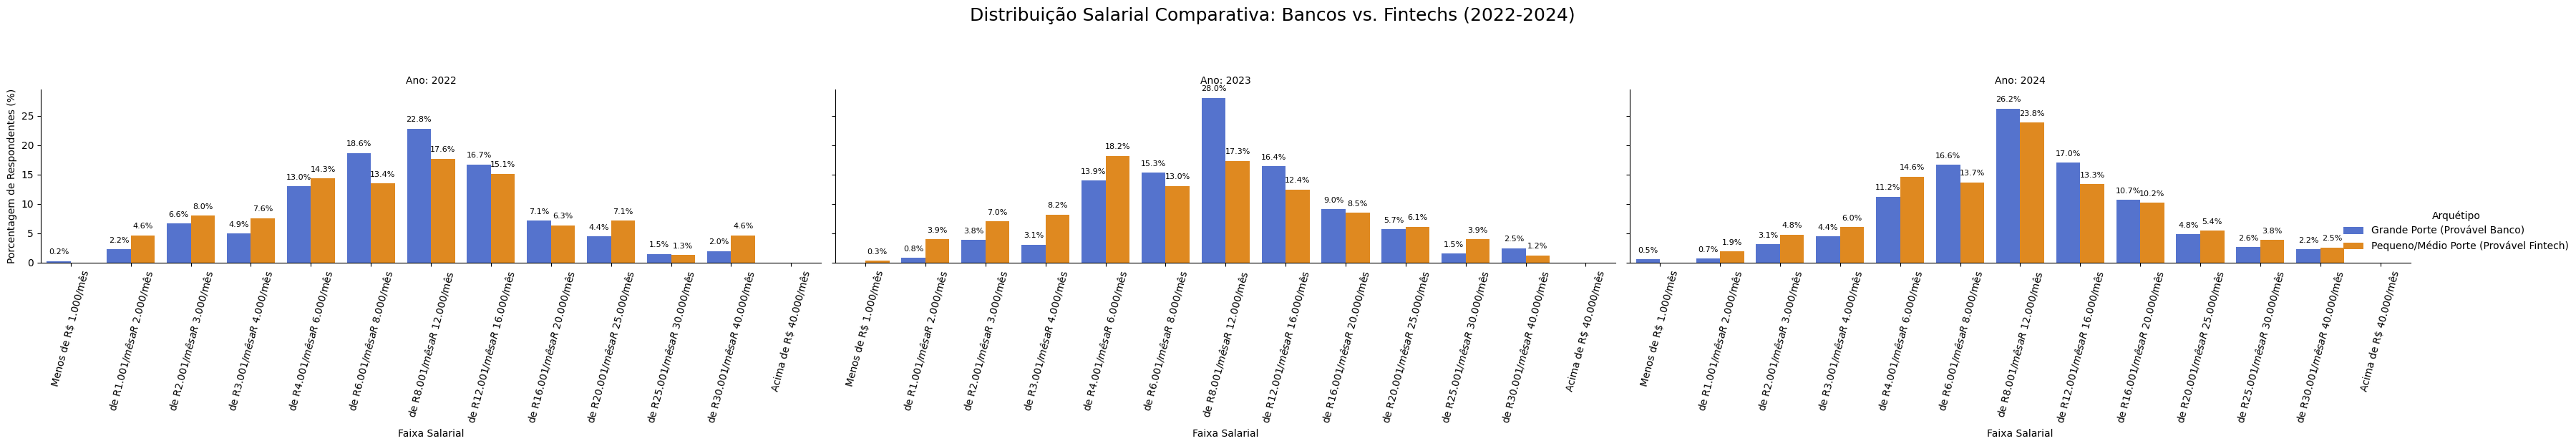

In [256]:
# Criar o gráfico usando catplot para separar por ano e agrupar por arquétipo
g = sns.catplot(
    data=distribuicao_completa_df,
    x='faixa_salarial_ordenada',
    y='porcentagem',
    hue='arquétipo_tamanho',
    col='ano_base',          # Cria uma coluna de gráficos para cada ano
    kind='bar',
    aspect=1.8, # Deixa cada gráfico um pouco mais largo para caberem as barras
    height=6,   # Define a altura de cada gráfico
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'} # Define cores
)

# Melhorar a legibilidade e adicionar títulos
g.fig.suptitle('Distribuição Salarial Comparativa: Bancos vs. Fintechs (2022-2024)', y=1.03, fontsize=18)
g.set_axis_labels("Faixa Salarial", "Porcentagem de Respondentes (%)")
g.set_titles("Ano: {col_name}")

# Rotacionar os rótulos do eixo X em todos os sub-gráficos
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(75)

# Adicionar os valores percentuais no topo de cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        # Só adiciona o texto se a barra tiver altura (evita poluir com '0.0%')
        if p.get_height() > 0:
            ax.annotate(f"{p.get_height():.1f}%",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points',
                        fontsize=8)

# Mover a legenda para um local melhor
g.legend.set_title("Arquétipo")
g.legend.set_bbox_to_anchor((1.01, 0.5))

# Ajustar o layout
plt.tight_layout(rect=[0, 0, 0.95, 0.96]) # Ajusta o retângulo para a legenda caber

# Salvar a imagem
plt.savefig('distribuicao_salarial_comparativa_por_ano.png')

print("\nGráfico 'distribuicao_salarial_comparativa_por_ano.png' salvo com sucesso.")

## Cáculo de Variação Percentual Anual

Para garantir que o cálculo da variação percentual seja correto e coerente, o primeiro passo é ordenar os dados de forma adequada.

* Ordenamos o DataFrame distribuicao_completa_df por três colunas, em ordem hierárquica:

* arquétipo_tamanho — para agrupar os dados por categoria ou perfil de tamanho;

* faixa_salarial_ordenada — para manter as faixas salariais em sequência lógica;

ano_base — para garantir a ordenação cronológica dos dados.

In [259]:
#  É CRUCIAL ordenar os dados corretamente antes de calcular a variação
#    Ordenamos por arquétipo, faixa salarial e, por último, ano.
df_sorted = distribuicao_completa_df.sort_values(
    by=['arquétipo_tamanho', 'faixa_salarial_ordenada', 'ano_base']
)

# Agrupamos por arquétipo e faixa salarial, e calculamos a variação percentual na coluna 'porcentagem'
#    O resultado será a variação em relação à linha anterior DENTRO de cada grupo.
#    Como ordenamos por ano, a linha anterior é sempre o ano anterior.
variacao = df_sorted.groupby(['arquétipo_tamanho', 'faixa_salarial_ordenada'])['porcentagem'].pct_change()

#  Adicione esta nova série de variação de volta ao nosso dataframe
#    O resultado para 2022 será 'NaN' (nulo), pois não há ano anterior para comparar.
df_sorted['variacao_percentual'] = variacao

#  Converta para um formato de porcentagem mais legível e substitua os NaN por 0
df_variacao = df_sorted.copy()
df_variacao['variacao_percentual'] = df_variacao['variacao_percentual'].fillna(0).mul(100).round(2)

print("Cálculo da variação percentual ano a ano concluído. Veja uma amostra:")
# Mostrando um exemplo para uma faixa salarial específica em todos os anos e arquétipos
print(df_variacao[df_variacao['faixa_salarial_ordenada'] == 'de R$ 12.001/mês a R$ 16.000/mês'])

Cálculo da variação percentual ano a ano concluído. Veja uma amostra:
   ano_base                       arquétipo_tamanho  \
2      2022           Grande Porte (Provável Banco)   
27     2023           Grande Porte (Provável Banco)   
53     2024           Grande Porte (Provável Banco)   
14     2022  Pequeno/Médio Porte (Provável Fintech)   
42     2023  Pequeno/Médio Porte (Provável Fintech)   
68     2024  Pequeno/Médio Porte (Provável Fintech)   

             faixa_salarial_ordenada  porcentagem  \
2   de R$ 12.001/mês a R$ 16.000/mês        16.67   
27  de R$ 12.001/mês a R$ 16.000/mês        16.39   
53  de R$ 12.001/mês a R$ 16.000/mês        17.01   
14  de R$ 12.001/mês a R$ 16.000/mês        15.13   
42  de R$ 12.001/mês a R$ 16.000/mês        12.42   
68  de R$ 12.001/mês a R$ 16.000/mês        13.33   

                  faixa_salarial_str  \
2   de R$ 12.001/mês a R$ 16.000/mês   
27  de R$ 12.001/mês a R$ 16.000/mês   
53  de R$ 12.001/mês a R$ 16.000/mês   
14  de R$ 12

/tmp/ipython-input-259-1692897027.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Variacao Salarial Ano a Ano

Criamos um gráfico comparativo que mostra a variação percentual anual na distribuição salarial entre 2022-2023 e 2023-2024 para dois arquétipos: grandes empresas (prováveis bancos) e pequenas/médias empresas (prováveis fintechs). O gráfico evidencia quais faixas salariais tiveram aumento ou queda em cada ano, facilitando a visualização das dinâmicas salariais diferenciadas entre os setores ao longo do tempo.


Gráfico 'variacao_salarial_ano_a_ano.png' salvo com sucesso.


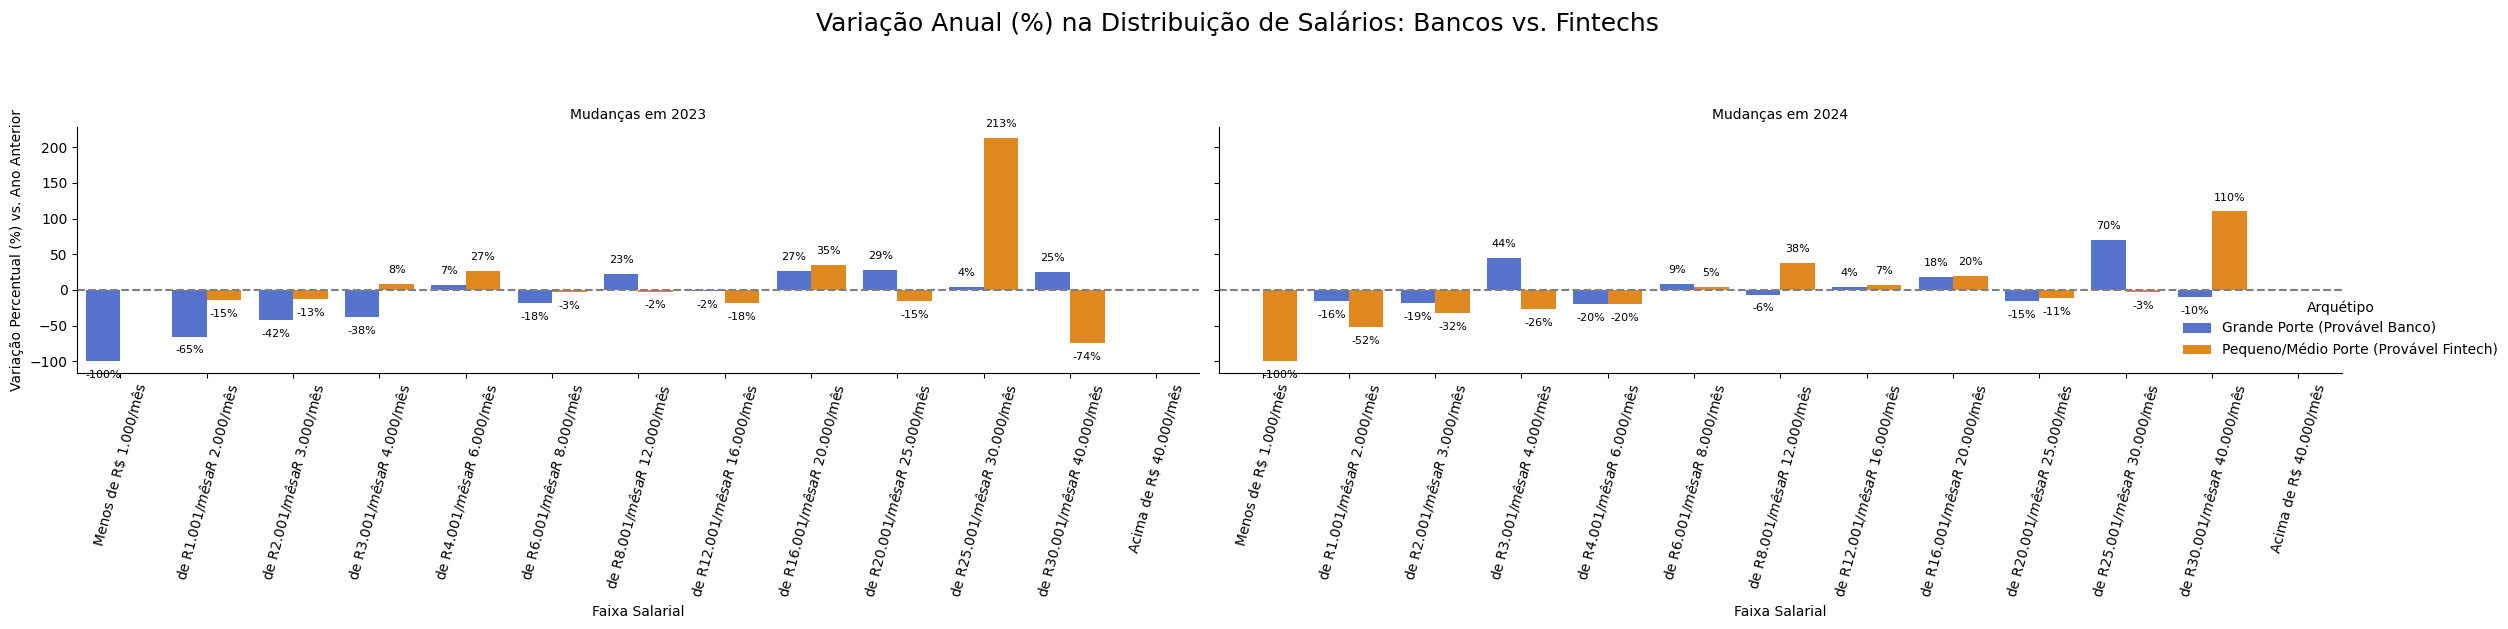

In [262]:

df_variacao['ano_base'] = pd.to_numeric(df_variacao['ano_base'], errors='coerce')
df_plot_variacao = df_variacao[df_variacao['ano_base'].isin([2023, 2024])]

# Verificação para garantir que o dataframe não está vazio ANTES de plotar
if df_plot_variacao.empty:
    print("AVISO: O DataFrame está vazio após o filtro. Não há dados para os anos 2023 e 2024.")
    print("O gráfico não será gerado.")
else:
    # 2. Criar o gráfico usando catplot
    g = sns.catplot(
        data=df_plot_variacao,
        x='faixa_salarial_ordenada',
        y='variacao_percentual',
        hue='arquétipo_tamanho',
        col='ano_base',
        kind='bar',
        aspect=1.8,
        height=6,
        palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
    )

    # 3. Melhorar a legibilidade e adicionar títulos
    g.fig.suptitle('Variação Anual (%) na Distribuição de Salários: Bancos vs. Fintechs', y=1.04, fontsize=18)
    g.set_axis_labels("Faixa Salarial", "Variação Percentual (%) vs. Ano Anterior")
    g.set_titles("Mudanças em {col_name}")

    #  Adicionar uma linha horizontal em y=0
    for ax in g.axes.flat:
        ax.axhline(0, color='grey', linestyle='--')

    #  Rotacionar os rótulos do eixo X
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(75)

    #  Adicionar os valores percentuais nas barras
    for ax in g.axes.flat:
        for p in ax.patches:
            if p.get_height() != 0:
                ax.annotate(f"{p.get_height():.0f}%",
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, np.sign(p.get_height())*10),
                            textcoords='offset points', fontsize=8)

    g.legend.set_title("Arquétipo")
    g.legend.set_bbox_to_anchor((1.01, 0.5))
    plt.tight_layout(rect=[0, 0, 0.95, 0.97])

    plt.savefig('variacao_salarial_ano_a_ano.png')
    print("\nGráfico 'variacao_salarial_ano_a_ano.png' salvo com sucesso.")

In [ ]:
# 1. Agrupe por arquétipo e faixa salarial, e calcule a MÉDIA das porcentagens
perfil_medio = distribuicao_completa_df.groupby(['arquétipo_tamanho', 'faixa_salarial_ordenada'])['porcentagem'].mean().round(2)

# 2. Transforme o resultado em um dataframe para o gráfico
perfil_medio_df = perfil_medio.reset_index()
perfil_medio_df.rename(columns={'porcentagem': 'media_porcentagem'}, inplace=True)


print("Perfil Médio de Distribuição Salarial (2022-2024):")
print(perfil_medio_df)


# Definir o tamanho do gráfico
plt.figure(figsize=(18, 9))

# Criar o gráfico de barras usando seaborn
ax = sns.barplot(
    data=perfil_medio_df,
    x='faixa_salarial_ordenada',
    y='media_porcentagem',
    hue='arquétipo_tamanho',
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

# Adicionar títulos e rótulos
plt.title('Perfil Médio de Distribuição Salarial: Bancos vs. Fintechs (2022-2024)', fontsize=20, pad=20)
plt.xlabel('Faixa Salarial', fontsize=14)
plt.ylabel('Média da Porcentagem de Funcionários (%)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X

# Adicionar os valores no topo das barras
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{p.get_height():.1f}%",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=9)

# Configurar a legenda
plt.legend(title='Arquétipo de Empresa', title_fontsize='13', fontsize='11')
plt.tight_layout()

# Salvar a imagem
plt.savefig('perfil_medio_salarial_geral.png')

print("\nGráfico 'perfil_medio_salarial_geral.png' salvo com sucesso.")

In [ ]:

# --- Calcular o 3º Quartil (p75) ---
p75_salary_by_level_archetype = df_financeiro.groupby(['nivel_senioridade', 'arquétipo_tamanho'])['salario_numerico'].quantile(0.75)
p75_salary_plot_df = p75_salary_by_level_archetype.reset_index()

# --- Visualizar o 3º Quartil ---
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=p75_salary_plot_df,
    x='nivel_senioridade',
    y='salario_numerico',
    hue='arquétipo_tamanho',
    order=['Júnior', 'Pleno', 'Sênior', 'Liderança'],
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)
plt.title('Salário do 3º Quartil (p75) por Senioridade e Arquétipo', fontsize=18)
plt.ylabel('Salário do 3º Quartil (R$)', fontsize=12)
plt.xlabel('Nível de Senioridade', fontsize=12)

# Adicionar valores (opcional)
for p in ax.patches:
    ax.annotate(f"R$ {p.get_height():,.0f}".replace(',', '.'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.legend(title='Arquétipo')
plt.tight_layout()
plt.savefig('p75_salarial_por_senioridade.png')
print("Gráfico do 3º Quartil salvo com sucesso.")

In [ ]:
plt.figure(figsize=(14, 9))
sns.boxplot(
    data=df_financeiro,
    x='nivel_senioridade',
    y='salario_numerico',
    hue='arquétipo_tamanho',
    order=['Júnior', 'Pleno', 'Sênior', 'Liderança'],
    palette={'Grande Porte (Provável Banco)': 'lightblue', 'Pequeno/Médio Porte (Provável Fintech)': 'lightsalmon'}
)
plt.title('Distribuição Salarial Completa por Senioridade e Arquétipo', fontsize=18)
plt.ylabel('Salário (R$)', fontsize=12)
plt.xlabel('Nível de Senioridade', fontsize=12)
plt.legend(title='Arquétipo')
plt.tight_layout()
plt.savefig('boxplot_salarial_por_senioridade.png')
print("Gráfico de Box Plot salvo com sucesso.")

In [ ]:

# As colunas de nuvem são booleanas (True/False ou 1/0), então podemos usar a média para obter a taxa de adoção.
# A média de uma coluna de 0s e 1s é o mesmo que a porcentagem de 1s.
cloud_columns = [
    'cloud_usada_aws',
    'cloud_usada_gcp',
    'cloud_usada_azure',
    'cloud_usada_on_premise' # Importante para analisar a migração de sistemas legados
]

# Agrupe por ano e arquétipo e calcule a média para cada coluna de nuvem
adoption_rates = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])[cloud_columns].mean().mul(100).round(2)

print("Taxa de Adoção (%) de Plataformas de Nuvem por Ano e Arquétipo:")
display(adoption_rates)

In [ ]:
# Preparar os dados para plotagem (transformar de formato "largo" para "longo")
adoption_plot_df = adoption_rates.reset_index().melt(
    id_vars=['ano_base', 'arquétipo_tamanho'],
    value_vars=cloud_columns,
    var_name='plataforma',
    value_name='taxa_de_adocao_percentual'
)

# Limpar os nomes das plataformas para o gráfico
adoption_plot_df['plataforma'] = adoption_plot_df['plataforma'].str.replace('cloud_usada_', '').str.upper()

print("\nDados prontos para plotagem:")
print(adoption_plot_df.head())


# Criar um gráfico para cada plataforma usando relplot
g = sns.relplot(
    data=adoption_plot_df,
    x='ano_base',
    y='taxa_de_adocao_percentual',
    hue='arquétipo_tamanho',
    style='arquétipo_tamanho',
    col='plataforma', # Cria um subgráfico para cada plataforma
    kind='line',
    markers=True,
    height=5,
    aspect=1.2,
    linewidth=2.5,
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

# Melhorar os títulos e rótulos
g.fig.suptitle('Evolução da Adoção de Plataformas Cloud: Bancos vs. Fintechs (2022-2024)', y=1.05, fontsize=18)
g.set_axis_labels("Ano", "Taxa de Adoção (%)")
g.set_titles("{col_name}")
g.legend.set_title("Arquétipo")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('evolucao_adocao_cloud.png')

print("\nGráfico 'evolucao_adocao_cloud.png' salvo com sucesso.")

In [ ]:
# 1. Crie uma coluna que soma quantas das 3 principais nuvens cada respondente usa
df_financeiro['num_clouds'] = df_financeiro[['cloud_usada_aws', 'cloud_usada_gcp', 'cloud_usada_azure']].sum(axis=1)

# 2. Crie uma coluna booleana para identificar quem é multicloud (usa 2 ou mais)
df_financeiro['is_multicloud'] = df_financeiro['num_clouds'] >= 2

# 3. Calcule a taxa de adoção de multicloud
multicloud_adoption = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])['is_multicloud'].mean().mul(100).round(2).reset_index()

# 4. Plote o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=multicloud_adoption,
    x='ano_base',
    y='is_multicloud',
    hue='arquétipo_tamanho',
    style='arquétipo_tamanho',
    markers=True,
    linewidth=2.5,
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)
plt.title('Evolução da Adoção de Estratégia Multicloud', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Taxa de Adoção Multicloud (%)')
plt.xticks([2022, 2023, 2024])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Arquétipo')
plt.tight_layout()
plt.savefig('evolucao_multicloud.png')

print("Gráfico 'evolucao_multicloud.png' salvo com sucesso.")

In [ ]:
try:
    df_lideres = df_financeiro[df_financeiro['atua_como_gestor'] == True].copy()
except TypeError:
    df_lideres = df_financeiro[df_financeiro['atua_como_gestor'] == 1].copy()


print(f"O número total de respondentes no setor financeiro é: {len(df_financeiro)}")
print(f"O número de líderes/gestores na nossa amostra é: {len(df_lideres)}")

In [ ]:
# Lista de colunas correspondentes aos desafios de gestão
challenge_columns = [
    'desafio_gestor_contratar_talentos', 'desafio_gestor_reter_talentos',
    'desafio_gestor_convencer_investimentos', 'desafio_gestor_equipes_remotas',
    'desafio_gestor_projetos_multidisciplinares', 'desafio_gestor_garantir_qualidade_dados',
    'desafio_gestor_processar_grande_volume', 'desafio_gestor_gerar_valor_negocio',
    'desafio_gestor_manter_modelos_ml_producao', 'desafio_gestor_gerenciar_expectativas',
    'desafio_gestor_manter_projetos_crescimento', 'desafio_gestor_inovar_com_dados',
    'desafio_gestor_garantir_roi', 'desafio_gestor_dividir_tempo_tecnico_gestao'
]

# Agrupar por arquétipo e calcular a média (que é a porcentagem para colunas 0/1)
challenges_summary = df_lideres.groupby('arquétipo_tamanho')[challenge_columns].mean().mul(100).round(2)

# Limpar os nomes das colunas para o gráfico
challenges_summary.columns = challenges_summary.columns.str.replace('desafio_gestor_', '').str.replace('_', ' ').str.title()

print("Porcentagem de líderes que apontou cada desafio:")
display(challenges_summary.T) # .T transpõe a tabela para melhor visualização

In [ ]:
# Preparar os dados para o gráfico
challenges_plot_df = challenges_summary.T.reset_index().rename(columns={'index': 'desafio'})
challenges_plot_df = challenges_plot_df.melt(
    id_vars='desafio',
    var_name='arquétipo',
    value_name='porcentagem'
)

# Calcular a diferença para ordenar o gráfico e destacar os maiores gaps
challenges_diff = challenges_summary.T['Pequeno/Médio Porte (Provável Fintech)'] - challenges_summary.T['Grande Porte (Provável Banco)']
sorted_challenges = challenges_diff.abs().sort_values(ascending=False).index

# Criar o gráfico
plt.figure(figsize=(14, 12))
ax = sns.barplot(
    data=challenges_plot_df,
    y='desafio',
    x='porcentagem',
    hue='arquétipo',
    order=sorted_challenges, # Ordena pela maior diferença!
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

# Adicionar títulos e rótulos
plt.title('Principais Desafios de Gestão: Bancos vs. Fintechs (2022-2024)', fontsize=20, pad=20)
plt.xlabel('Líderes que Reportaram o Desafio (%)', fontsize=14)
plt.ylabel('Desafio de Gestão', fontsize=14)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

# Adicionar os valores percentuais nas barras
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2,
                f'{width:.1f}%',
                va='center', fontsize=10)

plt.legend(title='Arquétipo', loc='lower right')
plt.tight_layout()
plt.savefig('comparativo_desafios_gestao.png')

print("\nGráfico 'comparativo_desafios_gestao.png' salvo com sucesso.")

In [ ]:

# Supondo que 'df_lideres' e 'challenge_columns' já existem do passo anterior

# Agrupe por ANO e ARQUÉTIPO e calcule a média para cada desafio
challenges_yearly = df_lideres.groupby(['ano_base', 'arquétipo_tamanho'])[challenge_columns].mean().mul(100).round(2)

# Limpar os nomes das colunas
challenges_yearly.columns = challenges_yearly.columns.str.replace('desafio_gestor_', '').str.replace('_', ' ').str.title()

print("Porcentagem de líderes que apontou cada desafio, por ano:")
display(challenges_yearly)



# 1. Preparar os dados para a visualização (formato "longo")
challenges_yearly_plot_df = challenges_yearly.reset_index().melt(
    id_vars=['ano_base', 'arquétipo_tamanho'],
    var_name='desafio',
    value_name='porcentagem'
)

print("\nDados prontos para a grade de gráficos:")
print(challenges_yearly_plot_df.head())


# 2. Criar a grade de gráficos de linha com relplot
g = sns.relplot(
    data=challenges_yearly_plot_df,
    x='ano_base',
    y='porcentagem',
    hue='arquétipo_tamanho',
    style='arquétipo_tamanho',
    col='desafio',      # Cria um subgráfico para cada desafio
    kind='line',
    col_wrap=3,         # Quebra a linha a cada 3 gráficos para não ficar muito largo
    height=4,
    aspect=1.5,
    markers=True,
    linewidth=2.5,
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

# 3. Melhorar os títulos e rótulos
g.fig.suptitle('Evolução dos Desafios de Gestão: Bancos vs. Fintechs (2022-2024)', y=1.03, fontsize=20)
g.set_axis_labels("Ano", "Líderes que Reportaram (%)")
g.set_titles("{col_name}") # Usa o nome do desafio como título de cada subgráfico
g.legend.set_title("Arquétipo")

# Ajustar o layout e salvar
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('evolucao_desafios_gestao.png')

print("\nGráfico 'evolucao_desafios_gestao.png' salvo com sucesso.")

In [ ]:
# 1. Filtrar apenas os anos de interesse
df_change = challenges_yearly.loc[[2022, 2024]]

# 2. Reset index and melt the DataFrame to long format
#    This creates 'arquétipo_tamanho', 'ano_base', 'desafio', and 'porcentagem' columns
df_long = df_change.reset_index().melt(
    id_vars=['ano_base', 'arquétipo_tamanho'],
    var_name='desafio',
    value_name='porcentagem'
)

# 3. Now pivot the long format DataFrame
df_pivoted = df_long.pivot_table(
    index=['arquétipo_tamanho', 'desafio'],
    columns='ano_base',
    values='porcentagem' # Now 'porcentagem' exists in df_long
)

print("Tabela pivotada com dados de 2022 e 2024:")
display(df_pivoted)

# 1. Calcular a variação percentual
# Importante: Se um desafio tinha 0% em 2022 e passou a ter em 2024, o aumento é tecnicamente infinito.
# Vamos tratar esses casos para que não quebrem nosso gráfico.
variacao = (df_pivoted[2024] - df_pivoted[2022]) / df_pivoted[2022]

# 2. Convert to percentage and handle division by zero (inf) and NaN from original 0s
#    Replacing inf/-inf with NaN first, then filling NaN with 0.
variacao_percentual = variacao.replace([np.inf, -np.inf], np.nan).fillna(0).mul(100).round(2)

# 3. Prepare the final dataframe for the chart, resetting the index from the pivot
df_plot_change = variacao_percentual.reset_index().rename(columns={0: 'variacao_percentual'})

print("\nVariação Percentual dos Desafios (2022 vs 2024):")
display(df_plot_change.head())

# Ordenar os desafios pela variação nas Fintechs para destacar a mudança nesse grupo
# Need to handle cases where 'Pequeno/Médio Porte (Provável Fintech)' might not have a specific challenge
fintech_variations = df_plot_change.loc[df_plot_change['arquétipo_tamanho'] == 'Pequeno/Médio Porte (Provável Fintech)']
# Ensure all challenges are included in the order, even if variation is 0 or NaN for fintech
ordem_grafico = fintech_variations.set_index('desafio')['variacao_percentual'].sort_values(ascending=False).index.tolist()

# If some challenges were only present for one archetype, add them to the end of the list
all_challenges = df_plot_change['desafio'].unique().tolist()
for challenge in all_challenges:
    if challenge not in ordem_grafico:
        ordem_grafico.append(challenge)


# Criar o gráfico
plt.figure(figsize=(14, 12))
ax = sns.barplot(
    data=df_plot_change,
    y='desafio',
    x='variacao_percentual',
    hue='arquétipo_tamanho',
    order=ordem_grafico, # Ordena pela maior mudança nas Fintechs
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

# Adicionar uma linha vertical em x=0 para separar aumento de diminuição
ax.axvline(0, color='grey', linestyle='--', alpha=0.6)

# Adicionar títulos e rótulos
plt.title('Variação % na Importância dos Desafios de Gestão (2022 vs. 2024)', fontsize=20, pad=20)
plt.xlabel('Variação Percentual (%)', fontsize=14)
plt.ylabel('Desafio de Gestão', fontsize=14)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Arquétipo', loc='lower right')
plt.tight_layout()
plt.savefig('variacao_desafios_gestao_2022_vs_2024.png')

print("\nGráfico 'variacao_desafios_gestao_2022_vs_2024.png' salvo com sucesso.")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df_financeiro' é seu dataframe principal

# --- PASSO 1: Simplificar a coluna ---

# Lista com todas as categorias que significam "Sim, participei de entrevista"
respostas_sim = [
    'Sim, fui aprovado e mudei de emprego',
    'Sim, fui aprovado mas decidi não mudar de emprego',
    'Sim, fiz entrevistas mas não fui aprovado',
    'Sim, fiz entrevistas mas não fui aprovado (ou ainda aguardo resposta)',
    'Sim, fui aprovado no meu primeiro emprego (ou estava sem emprego)'
]

# Crie uma nova coluna simplificada. Se o valor estiver na lista 'respostas_sim', categorize como 'Sim'.
# Caso contrário, categorize como 'Não'.
df_financeiro['entrevistou_simplificado'] = df_financeiro['participou_entrevistas_ultimos_6m'].apply(
    lambda x: 'Sim' if x in respostas_sim else 'Não'
)

print("Coluna simplificada criada com sucesso. Verificando os valores:")
print(df_financeiro['entrevistou_simplificado'].value_counts())


# --- PASSO 2: Calcular a porcentagem usando a nova coluna ---

# Agora o cálculo fica muito mais simples e robusto
entrevistas_rate = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])['entrevistou_simplificado'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index()

# Filtrar apenas as respostas "Sim" da nossa nova coluna
entrevistas_rate_sim = entrevistas_rate[entrevistas_rate['entrevistou_simplificado'] == 'Sim']


# --- PASSO 3: Plotar o gráfico (agora deve funcionar) ---

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=entrevistas_rate_sim,
    x='ano_base',
    y='porcentagem',
    hue='arquétipo_tamanho',
    style='arquétipo_tamanho',
    markers=True,
    linewidth=2.5,
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

plt.title('Profissionais que Participaram de Entrevistas nos Últimos 6 Meses (%)', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Profissionais (%)')
plt.xticks([2022, 2023, 2024])
plt.ylim(0) # Inicia o eixo Y em 0
plt.grid(True, linestyle='--')
plt.legend(title='Arquétipo')
plt.tight_layout()
plt.savefig('atividade_entrevistas_por_ano.png')
print("\nGráfico 'atividade_entrevistas_por_ano.png' salvo com sucesso.")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- PASSO 1: Simplificar a coluna com base nos valores que você encontrou ---

# Lista com todas as categorias que significam "Sim, tenho intenção/abertura para mudar"
respostas_sim_pretende_mudar = [
    'Não estou buscando, mas me considero aberto a outras oportunidades',
    'Estou em busca de oportunidades dentro ou fora do Brasil',
    'Estou em busca de oportunidades, mas apenas fora do Brasil'
]

# Crie uma nova coluna simplificada ('Sim'/'Não')
df_financeiro['pretende_mudar_simplificado'] = df_financeiro['pretende_mudar_emprego_ultimos_6m'].apply(
    lambda x: 'Sim' if x in respostas_sim_pretende_mudar else 'Não'
)

print("Coluna simplificada de 'pretende mudar' criada com sucesso:")
print(df_financeiro['pretende_mudar_simplificado'].value_counts())


# --- PASSO 2: Calcular a porcentagem e plotar o gráfico ---

# Calcular a porcentagem usando a nova coluna
pretende_mudar_rate = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])['pretende_mudar_simplificado'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index()

# Filtrar apenas as respostas "Sim"
pretende_mudar_rate_sim = pretende_mudar_rate[pretende_mudar_rate['pretende_mudar_simplificado'] == 'Sim']

# Plotar o gráfico de linha
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=pretende_mudar_rate_sim,
    x='ano_base',
    y='porcentagem',
    hue='arquétipo_tamanho',
    style='arquétipo_tamanho',
    markers=True,
    linewidth=2.5,
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

plt.title('Profissionais Abertos a Mudar de Emprego (%)', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Profissionais (%)')
plt.xticks([2022, 2023, 2024])
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Arquétipo')
plt.tight_layout()
plt.savefig('intencao_mudanca_por_ano.png')
print("\nGráfico 'intencao_mudanca_por_ano.png' salvo com sucesso.")
plt.show()

In [ ]:


print("--- Iniciando Análise 2: Mudança nos Critérios para Escolha de Emprego ---")

# Lista de colunas de critérios a serem analisadas
critérios_cols = [
    'criterio_escolha_remuneracao_salario', 'criterio_escolha_beneficios',
    'criterio_escolha_proposito_empresa', 'criterio_escolha_flexibilidade_remoto',
    'criterio_escolha_ambiente_clima', 'criterio_escolha_oportunidade_aprendizado',
    'criterio_escolha_plano_carreira', 'criterio_escolha_maturidade_dados_empresa'
]

# Filtrar dados de 2022 e 2024 para uma comparação "antes e depois"
df_critérios = df_financeiro[df_financeiro['ano_base'].isin([2022, 2024])]

# Calcular a porcentagem de profissionais que considera cada critério importante
critérios_summary = df_critérios.groupby('ano_base')[critérios_cols].mean().mul(100).round(2)
critérios_summary.columns = critérios_summary.columns.str.replace('criterio_escolha_', '').str.replace('_', ' ').str.title()

# Preparar os dados para a plotagem
critérios_plot_df = critérios_summary.T.reset_index().rename(columns={'index': 'criterio'}).melt(id_vars='criterio', var_name='ano', value_name='porcentagem')

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(14, 9))
sns.barplot(data=critérios_plot_df, y='criterio', x='porcentagem', hue='ano', palette='viridis')
plt.title('Mudança nos Critérios para Escolha de Emprego (2022 vs. 2024)', fontsize=18, pad=20)
plt.xlabel('Importância para os Profissionais (%)', fontsize=12)
plt.ylabel('Critério de Escolha', fontsize=12)
plt.legend(title='Ano')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('mudanca_criterios_emprego.png')

print("\nGráfico 'mudanca_criterios_emprego.png' salvo com sucesso.")
print("Tabela de dados gerada:")
display(critérios_summary.T)
print("\n--- Análise 2 Concluída ---")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Iniciando Análise 2: Mudança nos Critérios para Escolha de Emprego ---")

# Lista de colunas de critérios a serem analisadas
critérios_cols = [
    'criterio_escolha_remuneracao_salario', 'criterio_escolha_beneficios',
    'criterio_escolha_proposito_empresa', 'criterio_escolha_flexibilidade_remoto',
    'criterio_escolha_ambiente_clima', 'criterio_escolha_oportunidade_aprendizado',
    'criterio_escolha_plano_carreira', 'criterio_escolha_maturidade_dados_empresa'
]

# Filtrar dados de 2022 e 2024 para uma comparação "antes e depois"
df_critérios = df_financeiro[df_financeiro['ano_base'].isin([2022, 2024])]

# Calcular a porcentagem de profissionais que considera cada critério importante
critérios_summary = df_critérios.groupby('ano_base')[critérios_cols].mean().mul(100).round(2)
critérios_summary.columns = critérios_summary.columns.str.replace('criterio_escolha_', '').str.replace('_', ' ').str.title()

# Preparar os dados para a plotagem
critérios_plot_df = critérios_summary.T.reset_index().rename(columns={'index': 'criterio'}).melt(id_vars='criterio', var_name='ano', value_name='porcentagem')

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(14, 9))
sns.barplot(data=critérios_plot_df, y='criterio', x='porcentagem', hue='ano', palette='viridis')
plt.title('Mudança nos Critérios para Escolha de Emprego (2022 vs. 2024)', fontsize=18, pad=20)
plt.xlabel('Importância para os Profissionais (%)', fontsize=12)
plt.ylabel('Critério de Escolha', fontsize=12)
plt.legend(title='Ano')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('mudanca_criterios_emprego.png')

print("\nGráfico 'mudanca_criterios_emprego.png' salvo com sucesso.")
print("Tabela de dados gerada:")
display(critérios_summary.T)
print("\n--- Análise 2 Concluída ---")

In [ ]:
# Calculate the percentage of professionals considering each criteria, annually
# We need to group by year and then calculate the mean for each criteria column
criterios_anual = df_financeiro.groupby('ano_base')[critérios_cols].mean().mul(100).round(2)

# Clean up column names for better readability
criterios_anual.columns = criterios_anual.columns.str.replace('criterio_escolha_', '').str.replace('_', ' ').str.title()

print("Importância dos Critérios de Escolha de Emprego por Ano:")
display(criterios_anual)
criterios_plot_df = criterios_anual.reset_index().melt(
    id_vars='ano_base',
    var_name='criterio',
    value_name='porcentagem'
)

print("\nGerando o gráfico de evolução...")

# Criar a grade de gráficos com relplot
g = sns.relplot(
    data=criterios_plot_df,
    x='ano_base',
    y='porcentagem',
    col='criterio',     # Cria um subgráfico para cada critério
    kind='line',
    col_wrap=3,         # Quebra a linha a cada 3 gráficos
    height=4,
    aspect=1.5,
    marker='o',
    linewidth=2.5
)

# Melhorar os títulos e rótulos
g.fig.suptitle('Evolução da Importância dos Critérios de Escolha de Emprego (2022-2024)', y=1.04, fontsize=18)
g.set_axis_labels("Ano", "Importância (%)")
g.set_titles("{col_name}")
g.set(xticks=[2022, 2023, 2024], ylim=(0, None)) # Garante os ticks anuais e eixo Y começando em 0

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('evolucao_criterios_escolha.png')

print("\nGráfico 'evolucao_criterios_escolha.png' salvo com sucesso.")

In [ ]:


print("--- Iniciando Análise 1: Evolução da Formação Acadêmica ---")

# Calcular a distribuição percentual do nível de ensino por ano e arquétipo
formacao_dist = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])['nivel_ensino'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index()

# Criar o gráfico
g = sns.catplot(
    data=formacao_dist,
    x='ano_base',
    y='porcentagem',
    hue='nivel_ensino',
    col='arquétipo_tamanho',
    kind='bar',
    height=6,
    aspect=1.2,
    palette='YlGnBu'
)

g.fig.suptitle('Evolução da Formação Acadêmica por Arquétipo (2022-2024)', y=1.03, fontsize=16)
g.set_axis_labels("Ano", "Profissionais (%)")
g.set_titles("Arquétipo: {col_name}")
g.legend.set_title("Nível de Ensino")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('evolucao_formacao.png')
print("\nGráfico 'evolucao_formacao.png' salvo com sucesso.")
plt.show()

In [ ]:
print("\n--- Iniciando Análise 2: Evolução da Senioridade ---")

# Calcular a distribuição de senioridade
senioridade_dist = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])['nivel_senioridade'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index()

# Definir a ordem correta para a legenda
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Liderança']
senioridade_dist['nivel_senioridade'] = pd.Categorical(senioridade_dist['nivel_senioridade'], categories=ordem_senioridade, ordered=True)


# Transformar os dados para um formato de "stacked bar" (barra empilhada)
senioridade_pivot = senioridade_dist.pivot_table(index=['ano_base', 'arquétipo_tamanho'], columns='nivel_senioridade', values='porcentagem')

# Plotar o gráfico de barras empilhadas
ax = senioridade_pivot.plot( # Assign the plot to an axis object
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='viridis',
    width=0.8
)

# Adicionar títulos e rótulos
plt.title('Distribuição de Senioridade por Arquétipo (2022-2024)', fontsize=18)
plt.ylabel('Profissionais (%)')
plt.xlabel('Ano e Arquétipo')
plt.xticks(rotation=45)
plt.legend(title='Nível de Senioridade', bbox_to_anchor=(1.02, 1), loc='upper left')

# Add percentage labels to each bar segment
for c in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c] # Format label and avoid 0%
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8, color='white') # Add labels to bars

plt.tight_layout()
plt.savefig('evolucao_senioridade.png')
print("\nGráfico 'evolucao_senioridade.png' salvo com sucesso.")
plt.show()

In [ ]:
print("\n--- Iniciando Análise 4: Aprofundamento das Competências Técnicas ---")

# Definir as strings corretas para Cientista de Dados baseadas nos valores únicos
ds_strings = [
    '*Ciência de Dados/Machine Learning: *Desenha e executa experimentos com o objetivo de responder perguntas do negócio; desenvolve modelos preditivos e algoritmos de Machine Learning com o objetivo de otimizar e automatizar a tomada de decisão.',
    '*Ciência de Dados/Machine Learning/AI: *Desenha e executa experimentos com o objetivo de responder perguntas do negócio; desenvolve modelos preditivos e algoritmos de Machine Learning com o objetivo de otimizar e automatizar a tomada de decisão.'
]

# Filtrar apenas Cientistas de Dados usando as strings corretas
df_ds = df_financeiro[df_financeiro['principal_atuacao_dados'].isin(ds_strings)].copy()

# Colunas de técnicas de DS
tecnicas_ds_cols = [
    'tecnica_ds_regressao', 'tecnica_ds_redes_neurais_arvores',
    'tecnica_ds_sistemas_recomendacao', 'tecnica_ds_nlp',
    'tecnica_ds_series_temporais', 'tecnica_ds_visao_computacional'
]

# Calcular a taxa de uso de cada técnica
tecnicas_summary = df_ds.groupby(['ano_base', 'arquétipo_tamanho'])[tecnicas_ds_cols].mean().mul(100).round(2)
tecnicas_summary.columns = tecnicas_summary.columns.str.replace('tecnica_ds_', '').str.replace('_', ' ').str.title()

# Preparar e plotar
tecnicas_plot_df = tecnicas_summary.reset_index().melt(id_vars=['ano_base', 'arquétipo_tamanho'], var_name='tecnica', value_name='porcentagem')

g = sns.relplot(
    data=tecnicas_plot_df,
    x='ano_base',
    y='porcentagem',
    hue='arquétipo_tamanho',
    col='tecnica',
    kind='line',
    col_wrap=3,
    height=4,
    aspect=1.5,
    markers=True,
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)
g.fig.suptitle('Evolução do Uso de Técnicas de Data Science (2022-2024)', y=1.04, fontsize=16)
g.set_axis_labels("Ano", "Cientistas de Dados que Utilizam (%)")
g.set_titles("{col_name}")
g.set(xticks=[2022, 2023, 2024])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('evolucao_tecnicas_ds.png')
print("\nGráfico 'evolucao_tecnicas_ds.png' salvo com sucesso.")
plt.show()

In [ ]:


print("\n--- Refazendo a Análise 3: Especialização das Áreas de Atuação (Nova Visualização) ---")

# PASSO 1: Calcular a distribuição (mesmo cálculo de antes)
atuacao_dist = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])['principal_atuacao_dados'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index()

# PASSO 2: Pivotar os dados para o formato de barra empilhada
# O índice será o ano e arquétipo, as colunas serão os cargos, e os valores a porcentagem.
atuacao_pivot = atuacao_dist.pivot_table(
    index=['ano_base', 'arquétipo_tamanho'],
    columns='principal_atuacao_dados',
    values='porcentagem',
    fill_value=0 # Preenche cargos não existentes em um grupo com 0
)

# PASSO 3: Separar os dados por arquétipo para criar gráficos lado a lado
df_bancos = atuacao_pivot.loc[atuacao_pivot.index.get_level_values('arquétipo_tamanho') == 'Grande Porte (Provável Banco)']
df_fintechs = atuacao_pivot.loc[atuacao_pivot.index.get_level_values('arquétipo_tamanho') == 'Pequeno/Médio Porte (Provável Fintech)']

# PASSO 4: Criar a visualização com subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True) # 1 linha, 2 colunas

# Gráfico para Bancos
df_bancos.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    colormap='Blues_r',
    width=0.8
)
ax1.set_title('Composição da Equipe de Dados em Bancos', fontsize=16)
ax1.set_xlabel('Ano')
ax1.set_ylabel('Distribuição de Cargos (%)')
ax1.tick_params(axis='x', labelrotation=0)
ax1.get_legend().remove() # Remove a legenda individual

# Gráfico para Fintechs
df_fintechs.plot(
    kind='bar',
    stacked=True,
    ax=ax2,
    colormap='Oranges_r',
    width=0.8
)
ax2.set_title('Composição da Equipe de Dados em Fintechs', fontsize=16)
ax2.set_xlabel('Ano')
ax2.set_ylabel('') # Remove o rótulo Y para não poluir
ax2.tick_params(axis='x', labelrotation=0)
ax2.get_legend().remove() # Remove a legenda individual

# Adicionar uma legenda unificada e um título geral
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Área de Atuação', bbox_to_anchor=(1.0, 0.8), loc='upper left')
fig.suptitle('Evolução da Composição das Equipes de Dados (2022-2024)', fontsize=20)

plt.tight_layout(rect=[0, 0, 0.85, 0.95]) # Ajusta para a legenda caber
plt.savefig('evolucao_composicao_equipes.png')

print("\nGráfico refeito 'evolucao_composicao_equipes.png' salvo com sucesso.")
plt.show()

In [ ]:
print("--- Refazendo Análise Final 1: Gráfico de Radar (Versão Final Corrigida) ---")

# --- PASSO A: Calcular cada métrica individualmente ---

df_radar = pd.DataFrame(index=['Grande Porte (Provável Banco)', 'Pequeno/Médio Porte (Provável Fintech)'])

# =================================================================================
# SE NECESSÁRIO, AJUSTE O TEXTO ABAIXO COM BASE NO RESULTADO DA SUA VERIFICAÇÃO
NOME_CARGO_ENGENHEIRO = 'Engenheiro de Dados (Data Engineer)'
# =================================================================================

metricas_calculadas = {
    'Salário Sênior': df_financeiro[df_financeiro['nivel_senioridade'] == 'Sênior'].groupby('arquétipo_tamanho')['salario_numerico'].median(),
    'Adoção AWS': df_financeiro.groupby('arquétipo_tamanho')['cloud_usada_aws'].mean() * 100,
    'Adoção On-Premise': df_financeiro.groupby('arquétipo_tamanho')['cloud_usada_on_premise'].mean() * 100,
    'Desafio: Reter Talentos': df_lideres.groupby('arquétipo_tamanho')['desafio_gestor_reter_talentos'].mean() * 100,
    'Perfil: Eng. de Dados': df_financeiro.groupby('arquétipo_tamanho').apply(lambda x: (x['principal_atuacao_dados'] == NOME_CARGO_ENGENHEIRO).mean()) * 100,
    'Inquietação (Abertos a Mudar)': df_financeiro.groupby('arquétipo_tamanho')['pretende_mudar_simplificado'].apply(lambda x: (x == 'Sim').mean()) * 100
}

for nome, serie in metricas_calculadas.items():
    df_radar[nome] = serie

df_radar.fillna(0, inplace=True)

# --- PASSO B: Normalização Melhorada ---

df_radar_normalized = pd.DataFrame(index=df_radar.index)

for col in df_radar.columns:
    min_val = df_radar[col].min()
    max_val = df_radar[col].max()

    # Lógica para evitar divisão por zero se todos os valores forem iguais
    if max_val == min_val:
        df_radar_normalized[col] = 50.0 # Atribui 50 (meio da escala) para empates
    else:
        df_radar_normalized[col] = (df_radar[col] - min_val) / (max_val - min_val) * 100

print("\nTabela de Métricas Normalizadas (CORRIGIDA):")
display(df_radar_normalized)

# --- PASSO C: Plotar o Gráfico de Radar (com o código corrigido) ---
labels = df_radar_normalized.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

def add_to_radar(archetype, color):
    values = df_radar_normalized.loc[archetype].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=archetype)
    ax.fill(angles, values, color=color, alpha=0.25)

add_to_radar('Grande Porte (Provável Banco)', 'royalblue')
add_to_radar('Pequeno/Médio Porte (Provável Fintech)', 'darkorange')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=12) # <--- CÓDIGO CORRIGIDO AQUI
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('DNA dos Arquétipos (Valores Normalizados e Corrigidos)', size=20, y=1.1)

plt.savefig('grafico_radar_dna_arquetipos_final.png')
print("\nGráfico 'grafico_radar_dna_arquetipos_final.png' salvo com sucesso.")
plt.show()


In [ ]:
print("\n--- Gerando Análise Final 2: Mapa de Calor das Diferenças ---")

# Reutilizando o dataframe df_radar da análise anterior
df_heatmap = df_radar.T # Transpor para ter métricas nas linhas
df_heatmap['Diferença (Fintech - Banco)'] = df_heatmap['Pequeno/Médio Porte (Provável Fintech)'] - df_heatmap['Grande Porte (Provável Banco)']

# Aplicar um gradiente de cores à coluna de diferença
styled_heatmap = df_heatmap.style.background_gradient(cmap='RdYlGn', subset=['Diferença (Fintech - Banco)']).format("{:.1f}")

print("\nMapa de Calor das Diferenças entre Arquétipos:")
display(styled_heatmap)
# Para salvar como imagem, você precisaria de bibliotecas adicionais como dataframe_image
# import dataframe_image as dfi
# dfi.export(styled_heatmap, 'heatmap_diferencas.png')

In [ ]:
print("\n--- Gerando Análise Final 3: Gráfico de Quadrantes Estratégicos ---")

# 1. Calcular a adoção de várias tecnologias para cada arquétipo
tech_cols = ['cloud_usada_aws', 'cloud_usada_azure', 'cloud_usada_gcp', 'cloud_usada_on_premise', 'banco_dados_usado_snowflake', 'banco_dados_usado_oracle', 'ferramenta_qualidade_dbt']
tech_adoption = df_financeiro.groupby('arquétipo_tamanho')[tech_cols].mean().mul(100)

# 2. Preparar dados para o scatter plot
df_quadrante = tech_adoption.T
df_quadrante.columns = ['Adoção em Bancos (%)', 'Adoção em Fintechs (%)']
df_quadrante['label'] = df_quadrante.index.str.replace('cloud_usada_', '').str.replace('banco_dados_usado_', '').str.replace('ferramenta_qualidade_', '').str.upper()

# 3. Criar o gráfico de dispersão (scatter plot)
plt.figure(figsize=(12, 12))
sns.scatterplot(data=df_quadrante, x='Adoção em Bancos (%)', y='Adoção em Fintechs (%)', s=150)

# Adicionar os rótulos para cada ponto
for i in range(df_quadrante.shape[0]):
    plt.text(x=df_quadrante['Adoção em Bancos (%)'][i]+0.5, y=df_quadrante['Adoção em Fintechs (%)'][i]+0.5, s=df_quadrante['label'][i],
             fontdict=dict(color='red', size=10))

# Linhas dos quadrantes (na mediana de cada eixo)
plt.axvline(df_quadrante['Adoção em Bancos (%)'].median(), color='grey', linestyle='--')
plt.axhline(df_quadrante['Adoção em Fintechs (%)'].median(), color='grey', linestyle='--')

# Títulos e textos dos quadrantes
plt.title('Quadrantes Estratégicos de Tecnologias', fontsize=20)
plt.xlabel('Predominância em Bancos (%)', fontsize=12)
plt.ylabel('Predominância em Fintechs (%)', fontsize=12)
plt.text(df_quadrante['Adoção em Bancos (%)'].max(), df_quadrante['Adoção em Fintechs (%)'].max(), 'Commodities', ha='right', va='top', fontsize=14, color='grey', alpha=0.8)
plt.text(df_quadrante['Adoção em Bancos (%)'].min(), df_quadrante['Adoção em Fintechs (%)'].max(), 'Território Fintech', ha='left', va='top', fontsize=14, color='grey', alpha=0.8)
plt.text(df_quadrante['Adoção em Bancos (%)'].max(), df_quadrante['Adoção em Fintechs (%)'].min(), 'Território Banco', ha='right', va='bottom', fontsize=14, color='grey', alpha=0.8)

plt.grid(True, linestyle=':', alpha=0.6)
plt.savefig('grafico_quadrantes_tecnologia.png')
print("\nGráfico 'grafico_quadrantes_tecnologia.png' salvo com sucesso.")
plt.show()

In [ ]:


print("--- Análise de Evolução na Adoção de Ferramentas ---")

# Lista das colunas de ferramentas que vamos analisar
tool_columns = [
    'ferramenta_bi_usada_powerbi',
    'ferramenta_bi_usada_looker',
    'ferramenta_qualidade_dbt',
    'etl_de_airflow',
    'banco_dados_usado_snowflake',
    'banco_dados_usado_databricks'
]

# Agrupar por ano e arquétipo e calcular a média (que é a porcentagem de uso)
adoption_tools = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])[tool_columns].mean().mul(100).round(2)

print("\nTabela: Taxa de Adoção de Ferramentas-Chave (%)")
display(adoption_tools)

In [ ]:
# Preparar os dados para plotagem (formato "longo")
tools_plot_df = adoption_tools.reset_index().melt(
    id_vars=['ano_base', 'arquétipo_tamanho'],
    value_vars=tool_columns,
    var_name='ferramenta',
    value_name='taxa_de_adocao'
)

# Limpar os nomes das ferramentas para os títulos do gráfico
tools_plot_df['ferramenta'] = tools_plot_df['ferramenta'].str.replace('ferramenta_bi_usada_', '') \
                                                          .str.replace('ferramenta_qualidade_', '') \
                                                          .str.replace('etl_de_', '') \
                                                          .str.replace('banco_dados_usado_', '') \
                                                          .str.title()

# Criar a grade de gráficos com relplot
g = sns.relplot(
    data=tools_plot_df,
    x='ano_base',
    y='taxa_de_adocao',
    hue='arquétipo_tamanho',
    style='arquétipo_tamanho',
    col='ferramenta', # Cria um subgráfico para cada ferramenta
    kind='line',
    col_wrap=3,       # Quebra a linha a cada 3 gráficos
    height=4.5,
    aspect=1.4,
    markers=True,
    linewidth=2.5,
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

# Melhorar os títulos e rótulos
g.fig.suptitle('Evolução na Adoção de Ferramentas de Dados (2022-2024)', y=1.04, fontsize=18)
g.set_axis_labels("Ano", "Taxa de Adoção (%)")
g.set_titles("{col_name}")
g.set(xticks=[2022, 2023, 2024])
g.legend.set_title("Arquétipo")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('evolucao_adocao_ferramentas.png')

print("\nGráfico 'evolucao_adocao_ferramentas.png' salvo com sucesso.")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Iniciando Análise Adicional: Evolução do Uso de Linguagens de Programação ---")

# 1. Selecionar as colunas de linguagens a serem analisadas
language_columns = [
    'linguagem_usada_python',
    'linguagem_usada_sql',
    'linguagem_usada_r',
    'linguagem_usada_scala',
    'linguagem_usada_sas_stata', # Um bom indicador de ambientes tradicionais/legados
    'linguagem_usada_java'
]

# 2. Calcular a taxa de adoção de cada linguagem
adoption_languages = df_financeiro.groupby(['ano_base', 'arquétipo_tamanho'])[language_columns].mean().mul(100).round(2)

print("\nTabela: Taxa de Adoção de Linguagens de Programação (%)")
display(adoption_languages)

# 3. Preparar os dados para a visualização
languages_plot_df = adoption_languages.reset_index().melt(
    id_vars=['ano_base', 'arquétipo_tamanho'],
    value_vars=language_columns,
    var_name='linguagem',
    value_name='taxa_de_adocao'
)

# Limpar os nomes das linguagens para os títulos do gráfico
languages_plot_df['linguagem'] = languages_plot_df['linguagem'].str.replace('linguagem_usada_', '').str.replace('_', ' ').str.title()

# 4. Criar a grade de gráficos com relplot
g = sns.relplot(
    data=languages_plot_df,
    x='ano_base',
    y='taxa_de_adocao',
    hue='arquétipo_tamanho',
    style='arquétipo_tamanho',
    col='linguagem',      # Cria um subgráfico para cada linguagem
    kind='line',
    col_wrap=3,           # Quebra a linha a cada 3 gráficos
    height=4.5,
    aspect=1.4,
    markers=True,
    linewidth=2.5,
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)

# Melhorar os títulos e rótulos
g.fig.suptitle('Evolução no Uso de Linguagens de Programação (2022-2024)', y=1.04, fontsize=18)
g.set_axis_labels("Ano", "Taxa de Adoção (%)")
g.set_titles("{col_name}")
g.set(xticks=[2022, 2023, 2024])
g.legend.set_title("Arquétipo")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('evolucao_adocao_linguagens.png')

print("\nGráfico 'evolucao_adocao_linguagens.png' salvo com sucesso.")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Iniciando Análise Bônus 1: Adoção de IA Generativa ---")

# --- Gráfico 1.1: IA Generativa como Prioridade ---

# Calcular a distribuição da prioridade de IA Gen
ia_prioridade_dist = df_financeiro.groupby('arquétipo_tamanho')['ia_generativa_prioridade_empresa'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index()

# Plotar o gráfico
plt.figure(figsize=(12, 7))
sns.barplot(
    data=ia_prioridade_dist,
    x='ia_generativa_prioridade_empresa',
    y='porcentagem',
    hue='arquétipo_tamanho',
    palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
)
plt.title('IA Generativa é uma Prioridade na Empresa?', fontsize=16)
plt.xlabel('Nível de Prioridade')
plt.ylabel('Profissionais (%)')
plt.xticks(rotation=15)
plt.legend(title='Arquétipo')
plt.tight_layout()
plt.savefig('ia_generativa_prioridade.png')
print("\nGráfico 'ia_generativa_prioridade.png' salvo com sucesso.")
plt.show()




In [ ]:
print("\n--- Iniciando Análise Bônus 2: A 'Bolha de SP' ---")

# 1. Criar a coluna de localização
df_financeiro['localizacao'] = df_financeiro['uf_onde_mora'].apply(
    lambda x: 'São Paulo' if x == 'SP' else 'Outros Estados'
)

print("\nDistribuição de respondentes por localização:")
print(df_financeiro['localizacao'].value_counts())

# --- Gráfico 2.1: Comparativo Salarial (Box Plot) ---
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_financeiro,
    x='nivel_senioridade',
    y='salario_numerico',
    hue='localizacao',
    order=['Júnior', 'Pleno', 'Sênior', 'Liderança'],
    palette='Pastel1'
)
plt.title('Distribuição Salarial: São Paulo vs. Outros Estados', fontsize=16)
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário (R$)')
plt.legend(title='Localização')
plt.tight_layout()
plt.savefig('salario_por_localizacao.png')
print("\nGráfico 'salario_por_localizacao.png' salvo com sucesso.")
plt.show()

# --- Gráfico 2.2: Composição das Equipes ---
comp_equipe_local = df_financeiro.groupby('localizacao')['principal_atuacao_dados'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=comp_equipe_local,
    y='principal_atuacao_dados',
    x='porcentagem',
    hue='localizacao',
    palette='Pastel2'
)
plt.title('Composição das Equipes de Dados: São Paulo vs. Outros Estados', fontsize=16)
plt.ylabel('Área de Atuação')
plt.xlabel('Profissionais (%)')
plt.legend(title='Localização')
plt.tight_layout()
plt.savefig('composicao_equipes_localizacao.png')
print("\nGráfico 'composicao_equipes_localizacao.png' salvo com sucesso.")
plt.show()

In [ ]:
print("--- Gerando novamente o Gráfico 1.2: Adoção de Copilot (Versão Corrigida) ---")

# Calcular a taxa de adoção do Copilot (o cálculo inicial estava correto)
copilot_adoption = df_financeiro.groupby(['arquétipo_tamanho'])['ia_produtividade_uso_copilot_dev'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index()

# =================================================================
# --- CORREÇÃO AQUI ---
# Filtramos pelo valor numérico 1.0, que representa "Sim"
copilot_adoption_sim = copilot_adoption[copilot_adoption['ia_produtividade_uso_copilot_dev'] == 1.0]
# =================================================================

# Plotar o gráfico
plt.figure(figsize=(10, 6))

if not copilot_adoption_sim.empty:
    ax = sns.barplot(
        data=copilot_adoption_sim,
        x='arquétipo_tamanho',
        y='porcentagem',
        palette={'Grande Porte (Provável Banco)': 'royalblue', 'Pequeno/Médio Porte (Provável Fintech)': 'darkorange'}
    )
    plt.title('Adoção de Copilot por Desenvolvedores (%)', fontsize=16)
    plt.xlabel('Arquétipo de Empresa')
    plt.ylabel('Profissionais que Utilizam (%)')

    # Adicionar os valores nas barras
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.tight_layout()
    plt.savefig('adocao_copilot_corrigido.png')
    print("\nGráfico 'adocao_copilot_corrigido.png' salvo com sucesso.")
    plt.show()
else:
    print("\n⚠️ Mesmo com a correção, nenhum dado foi encontrado para a condição de uso do Copilot.")
